In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
pd.set_option('display.max_columns',None)

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [ ]:
df.tail()

customer_id  credit_score  country  gender  age  tenure    balance  \
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop(['customer_id','country',],axis = 1)

In [ ]:
df.head()

credit_score  gender  age  tenure    balance  products_number  credit_card  \
0           619  Female   42       2       0.00                1            1   
1           608  Female   41       1   83807.86                1            0   
2           502  Female   42       8  159660.80                3            1   
3           699  Female   39       1       0.00                2            0   
4           850  Female   43       2  125510.82                1            1   

   active_member  estimated_salary  churn  
0              1         101348.88      1  
1              1         112542.58      0  
2              0         113931.57      1  
3              0          93826.63      0  
4              1          79084.10      0

In [ ]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

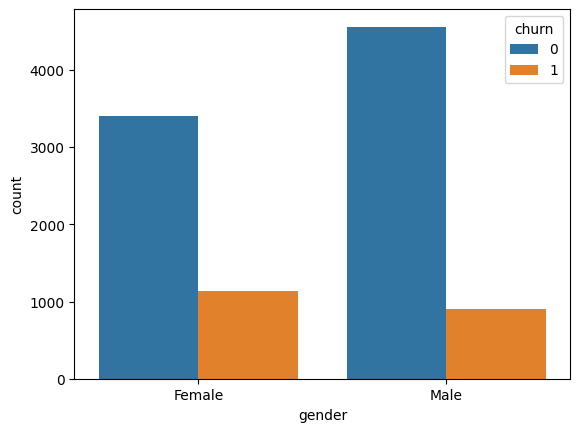

In [ ]:
sb.countplot(x = 'gender',data = df,hue = 'churn')

Column: credit_score


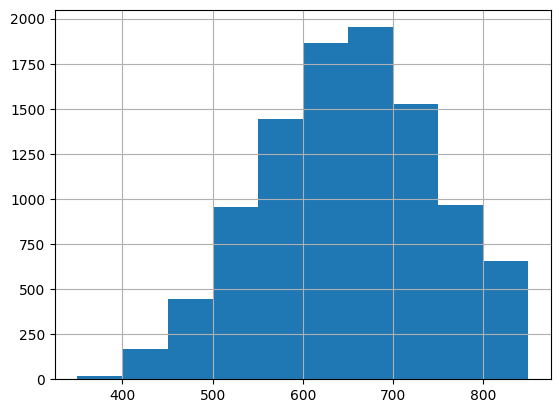

Column: gender


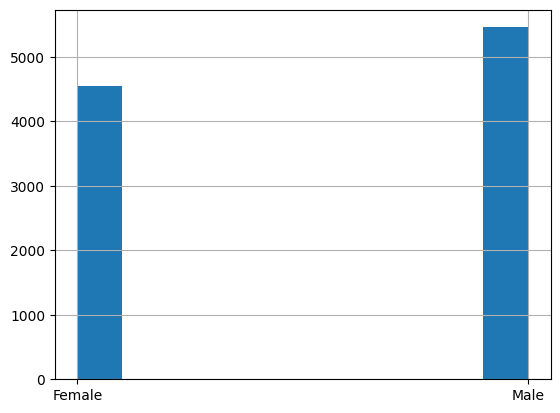

Column: age


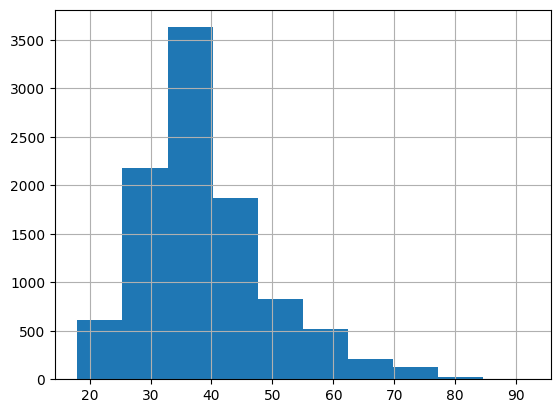

Column: tenure


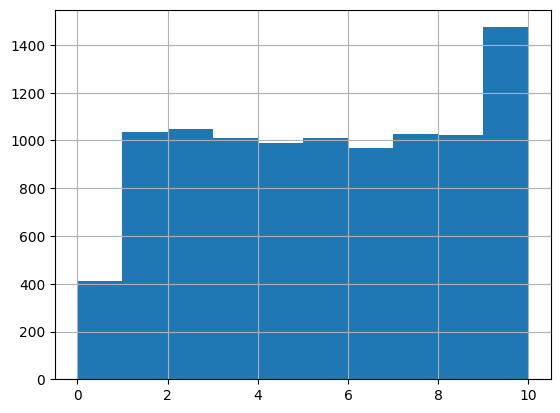

Column: balance


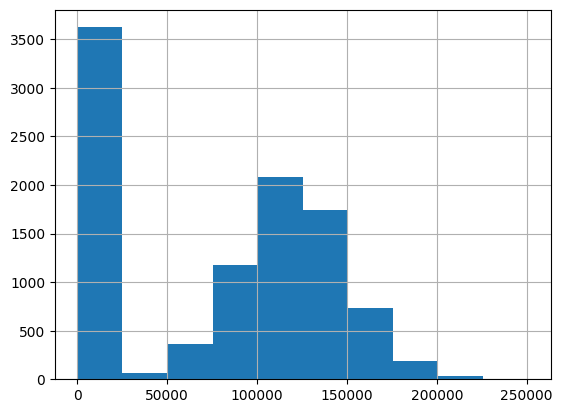

Column: products_number


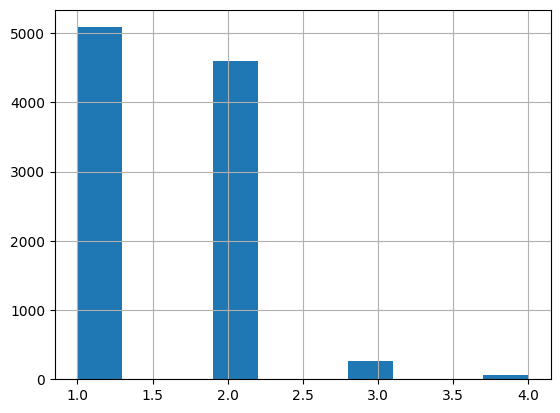

Column: credit_card


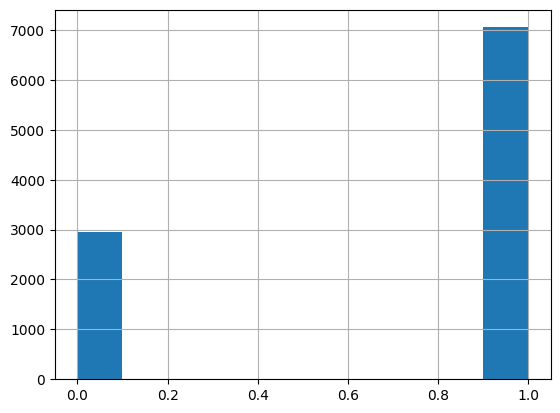

Column: active_member


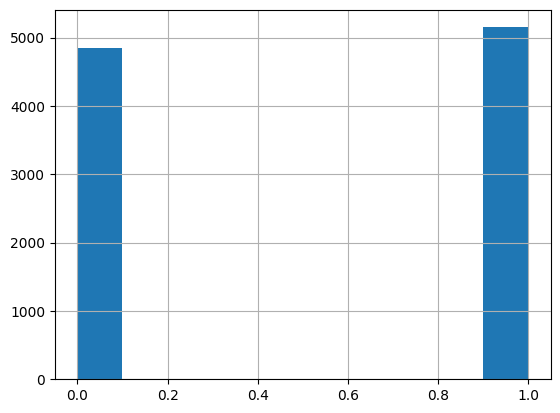

Column: estimated_salary


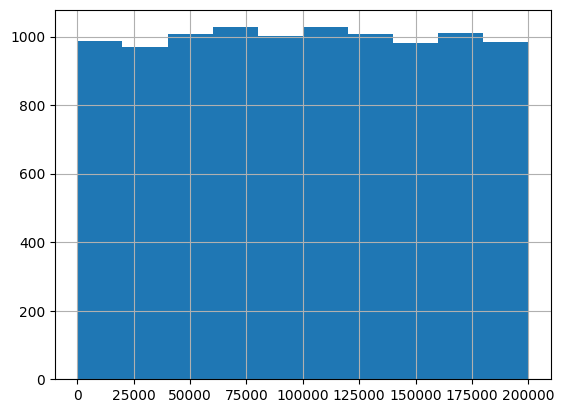

Column: churn


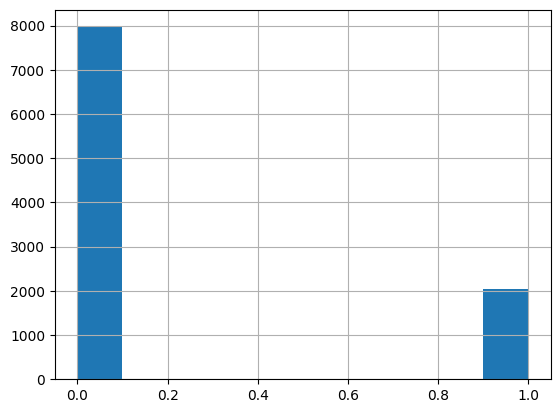

In [ ]:
col = df.columns
for i in col:
  print('Column:', i)
  df[i].hist()
  mpl.show()

column: credit_score


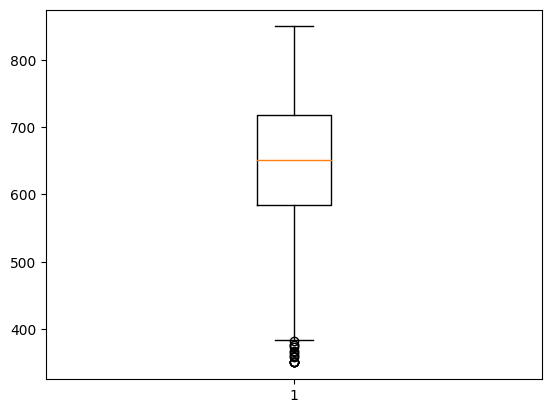

column: age


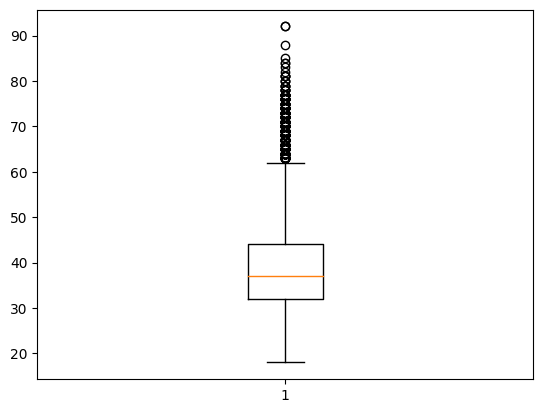

column: tenure


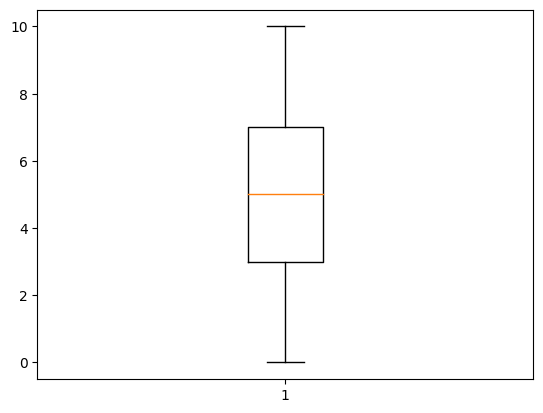

column: balance


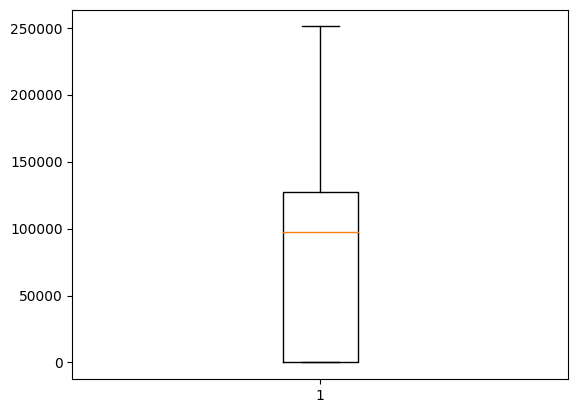

column: products_number


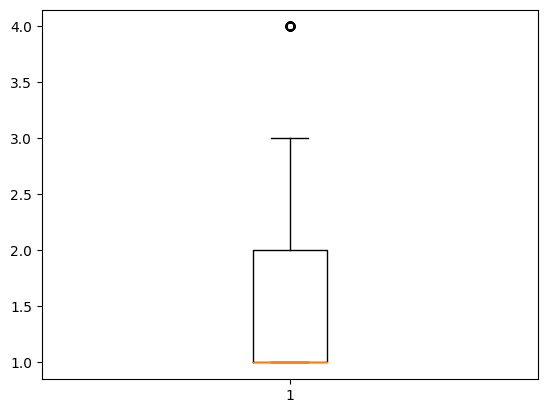

column: credit_card


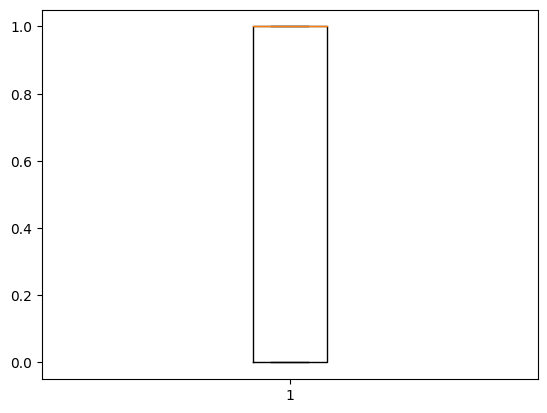

column: active_member


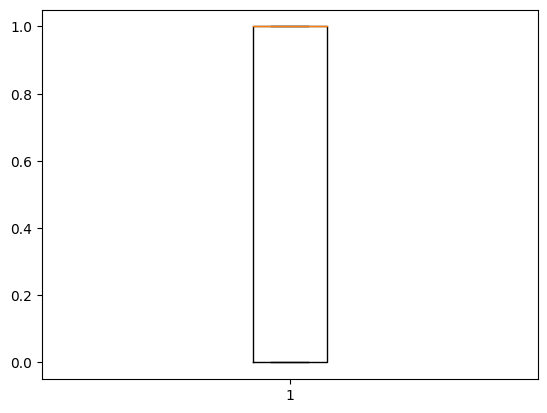

column: estimated_salary


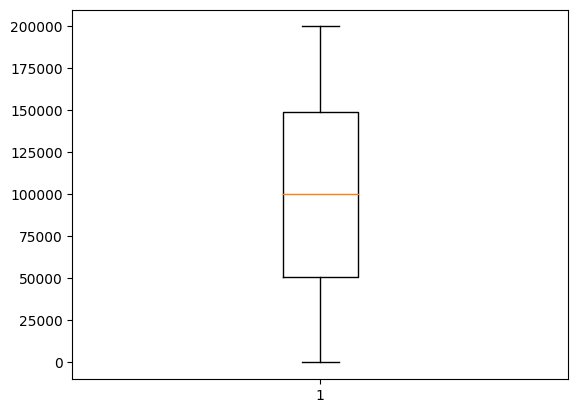

column: churn


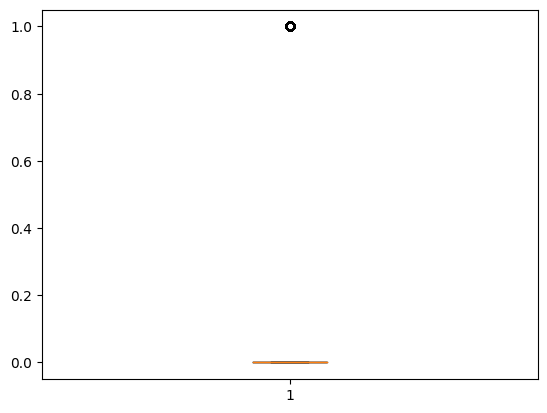

In [ ]:
col = []
for k in df.columns:
  if df[k].dtype == 'int' or df[k].dtype == 'float':
    col.append(k)
for j in col:
  print("column:",j)
  mpl.boxplot(df[j])
  mpl.show()

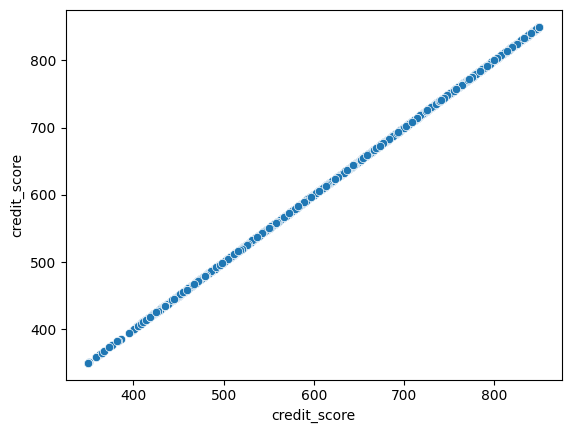

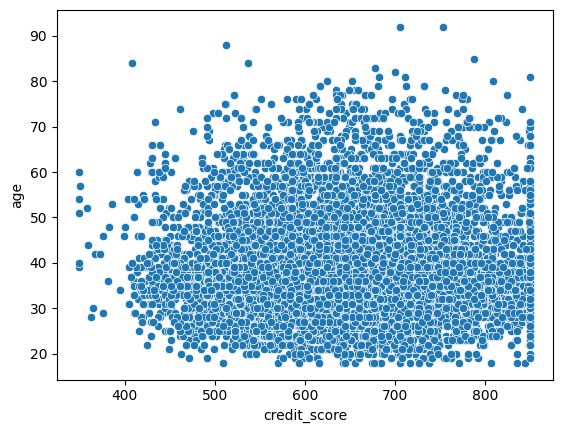

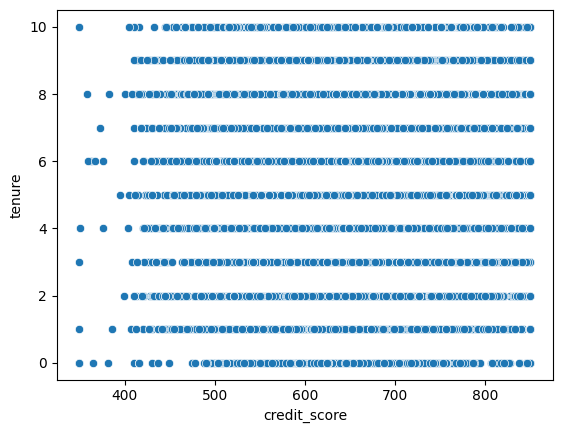

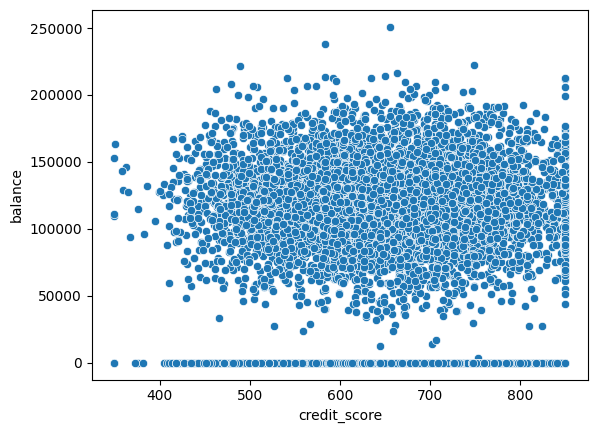

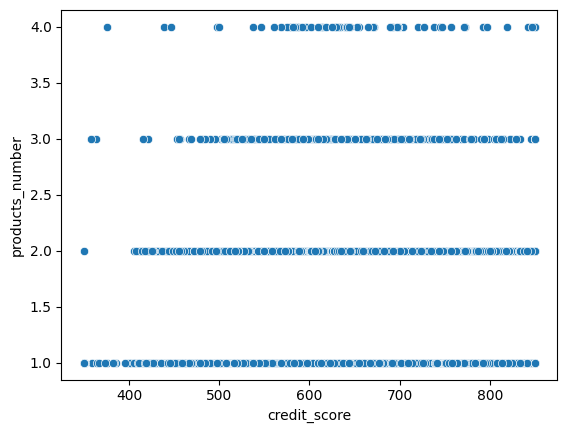

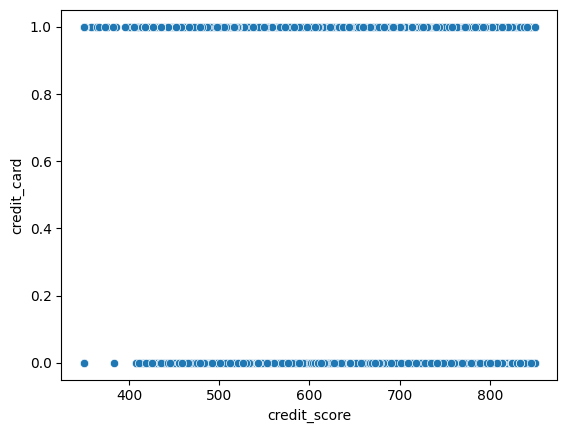

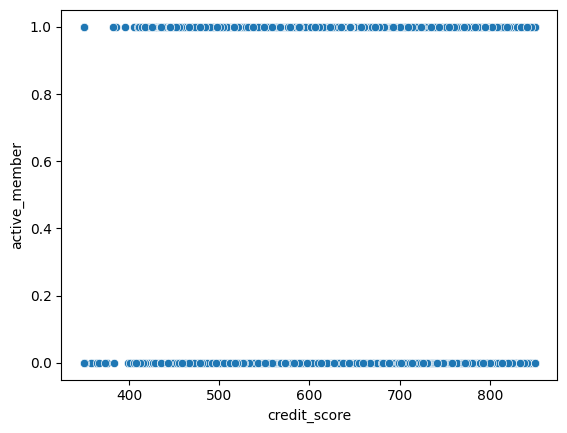

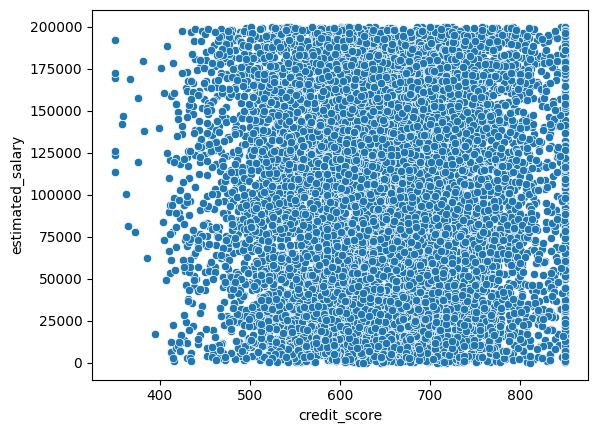

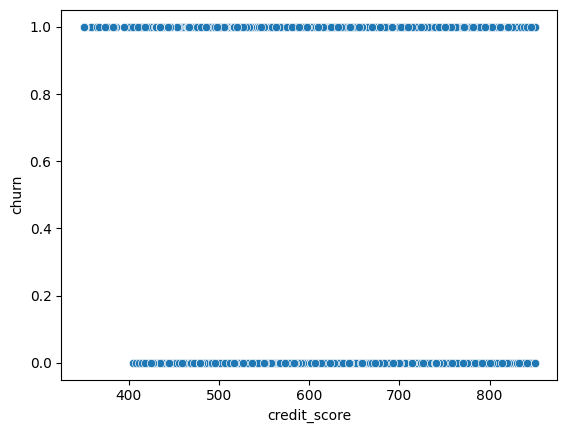

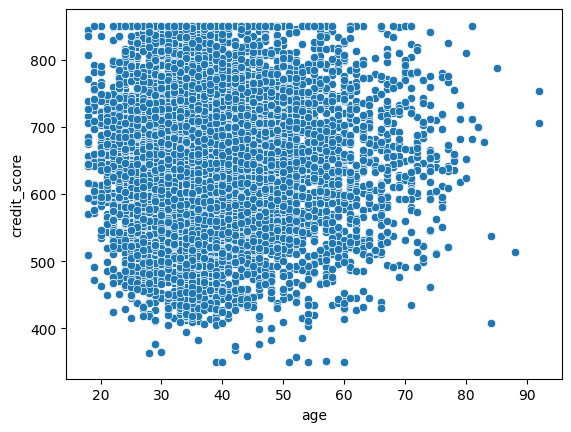

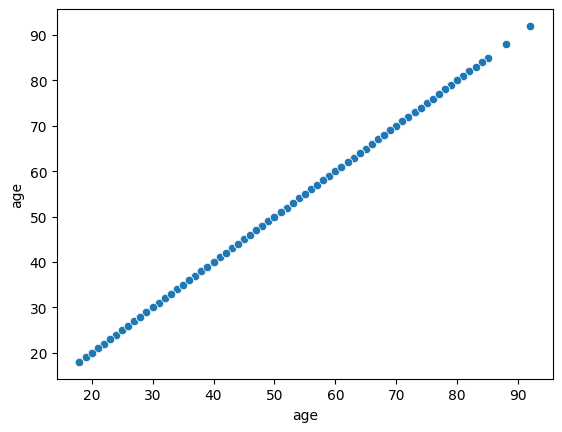

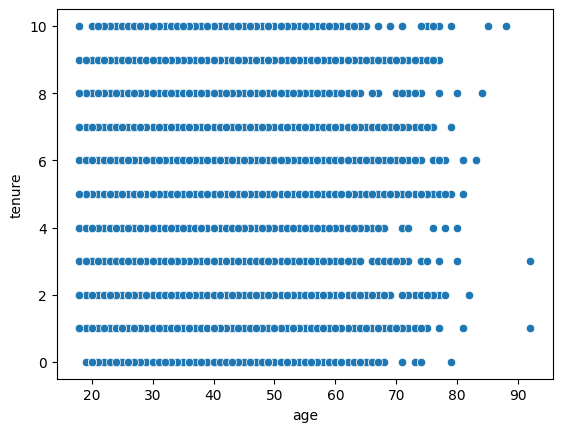

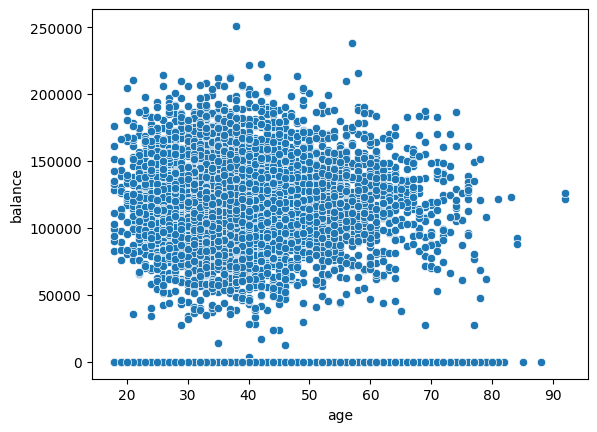

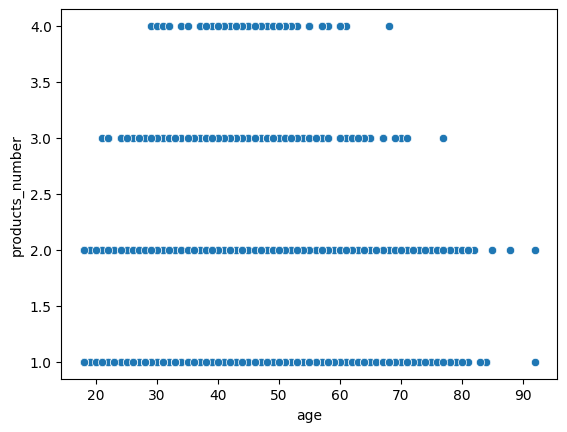

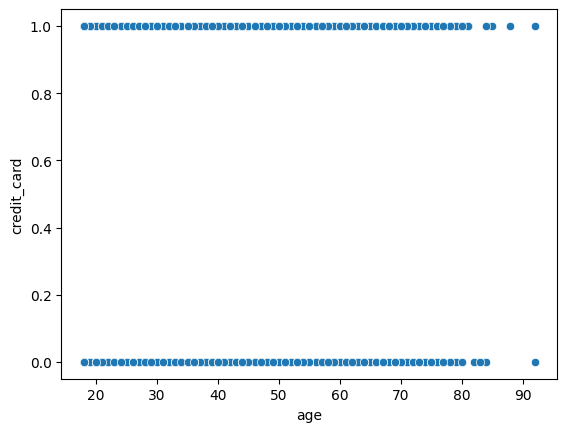

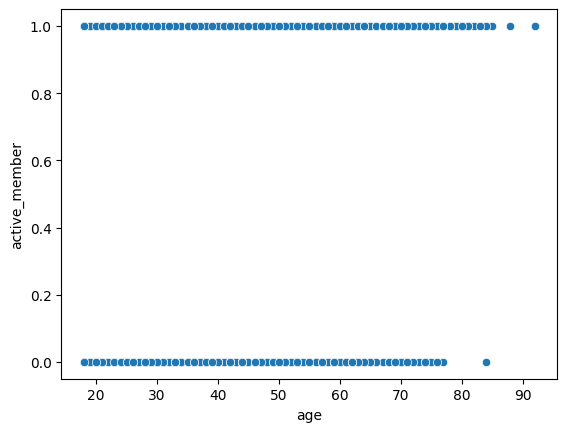

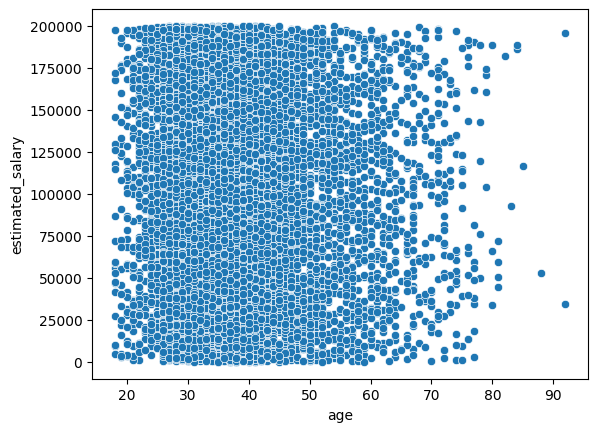

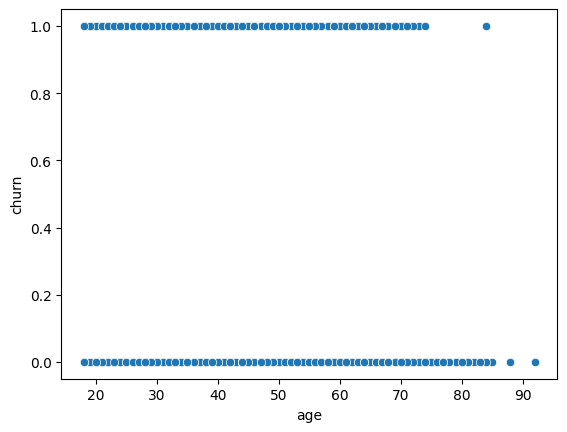

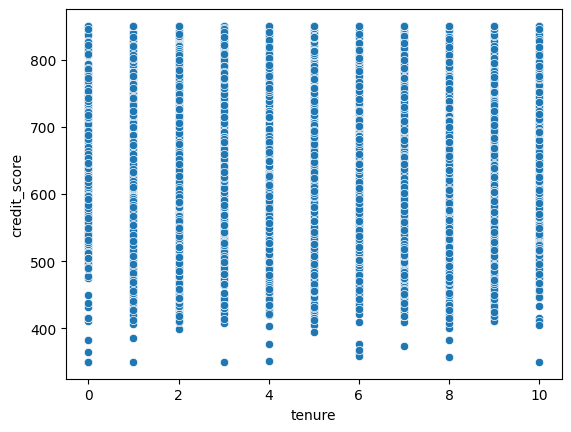

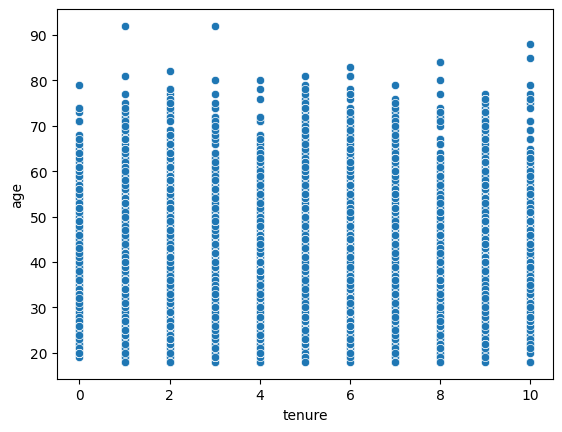

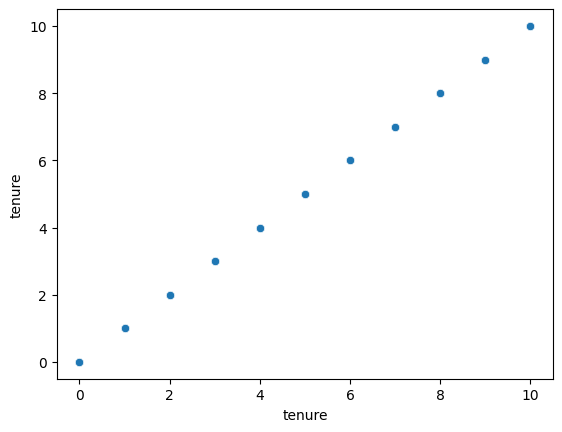

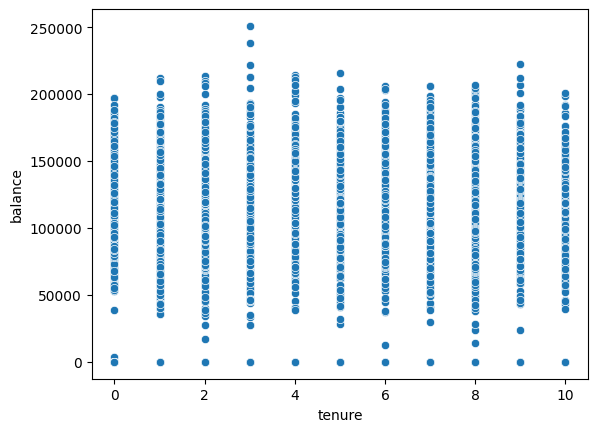

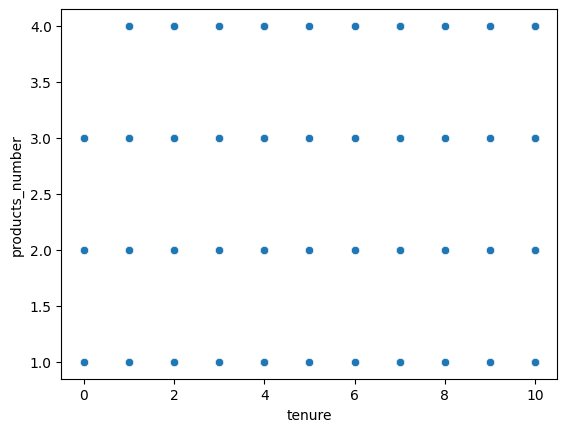

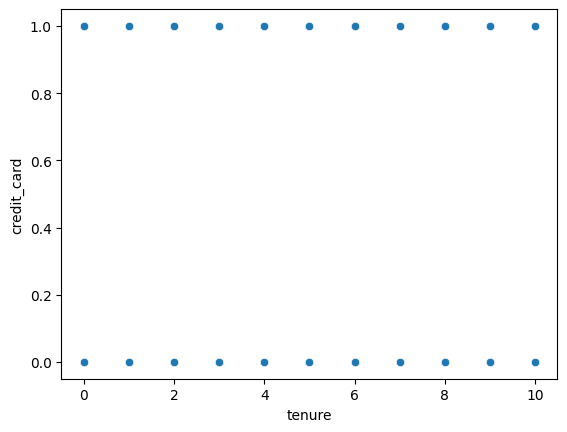

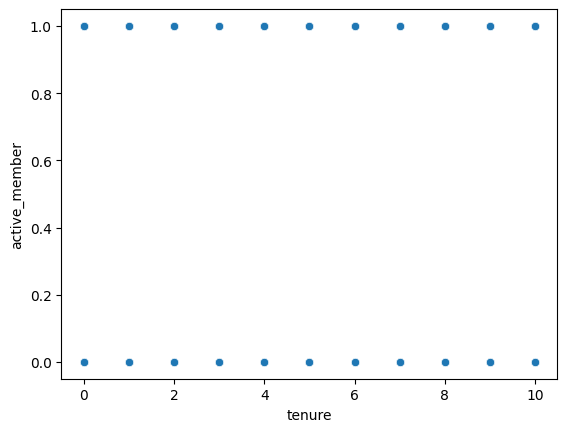

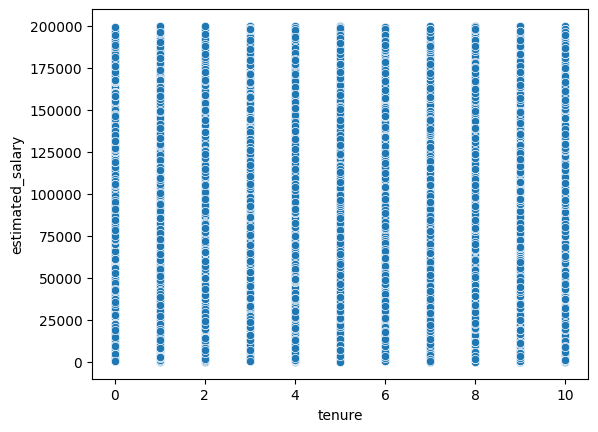

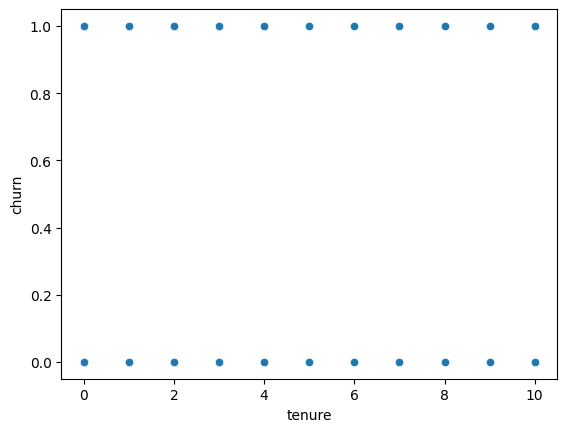

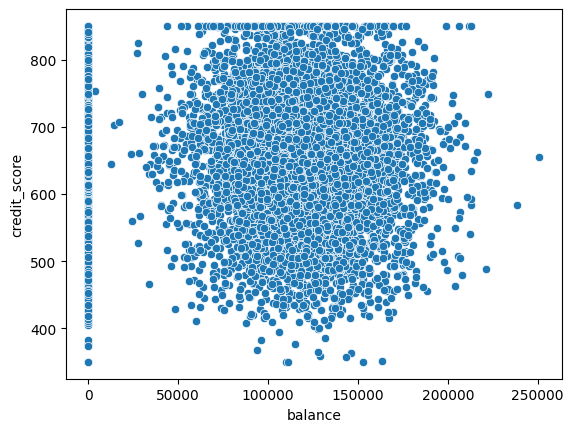

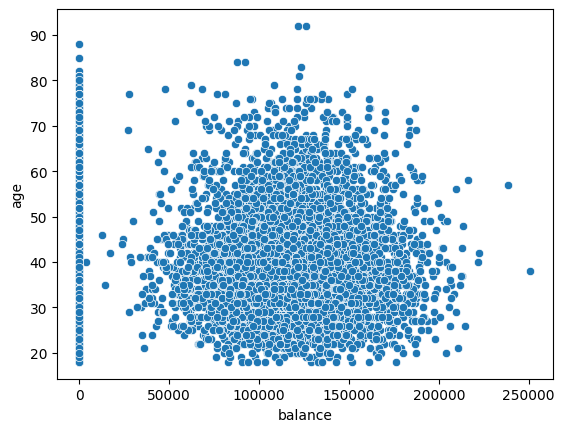

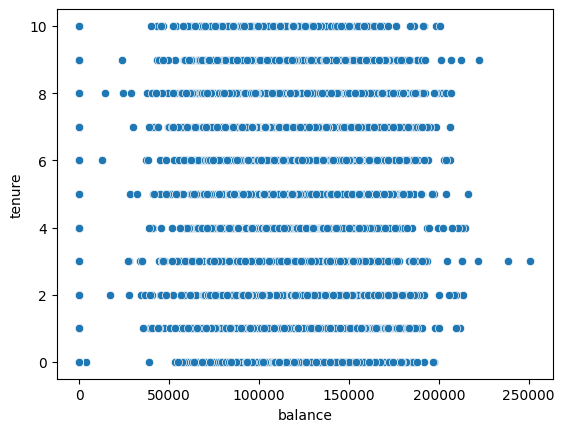

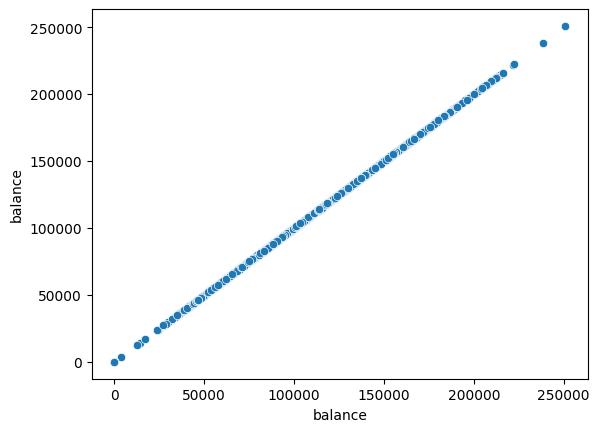

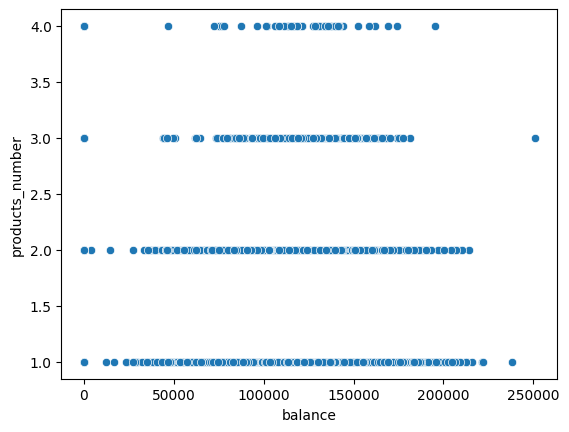

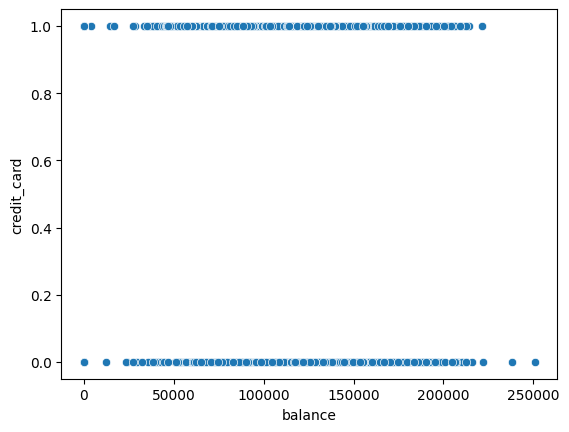

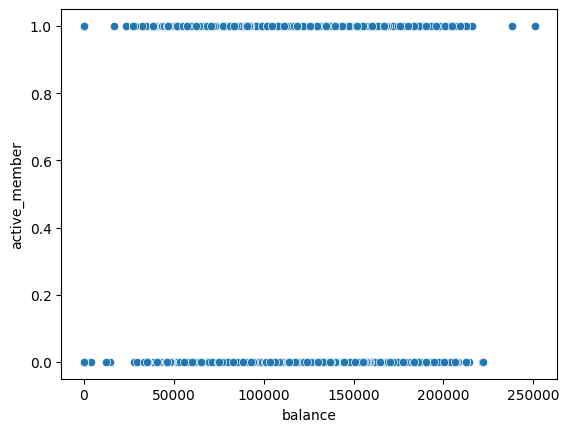

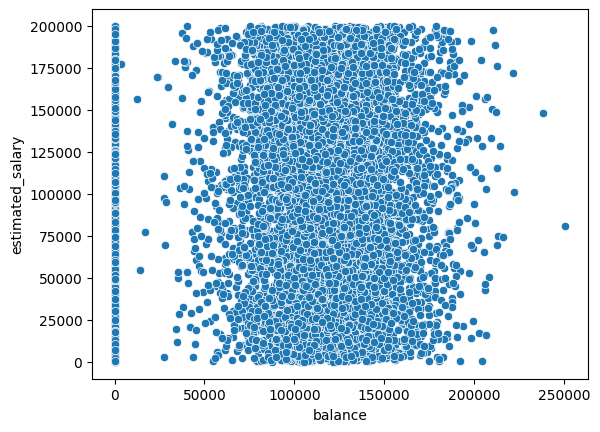

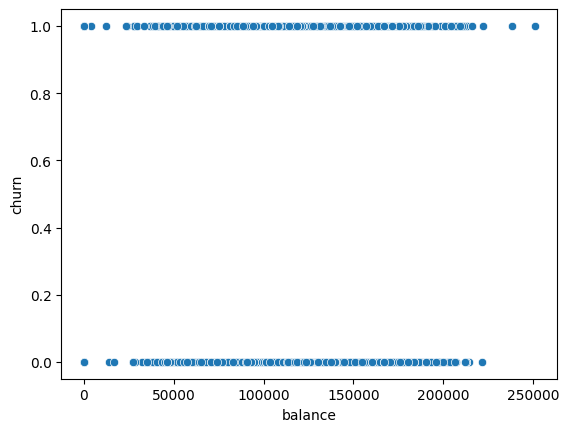

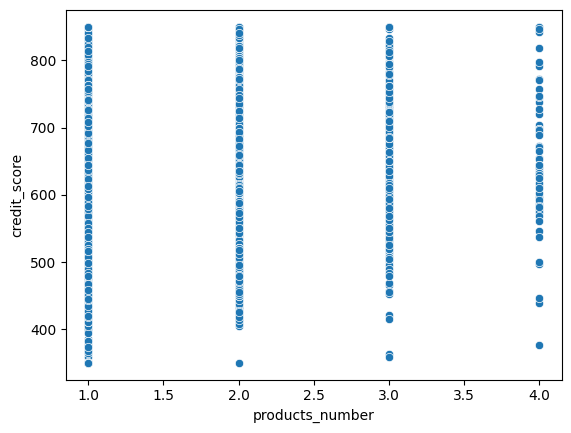

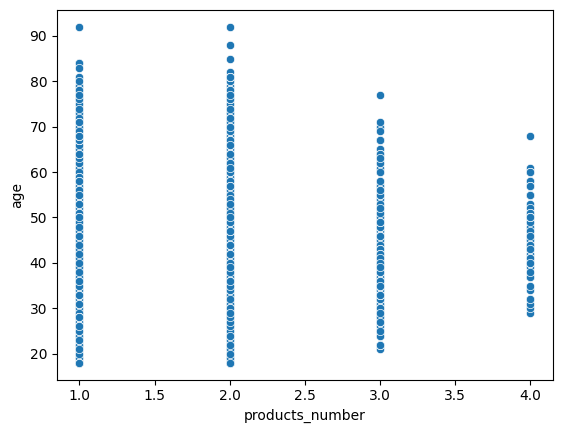

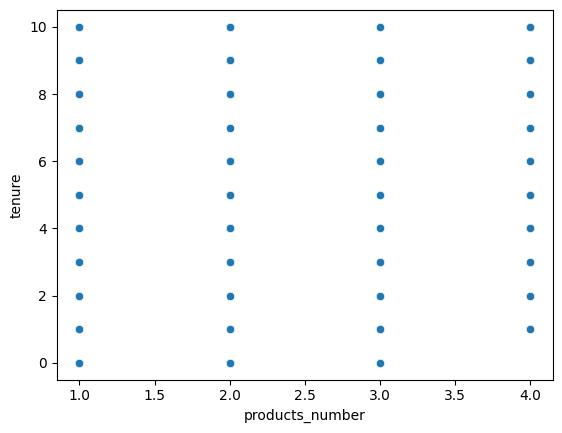

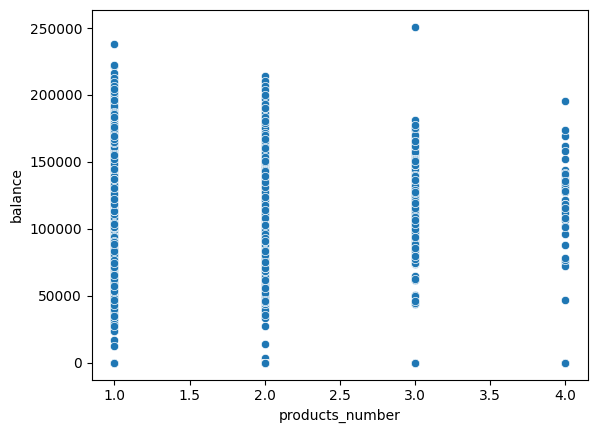

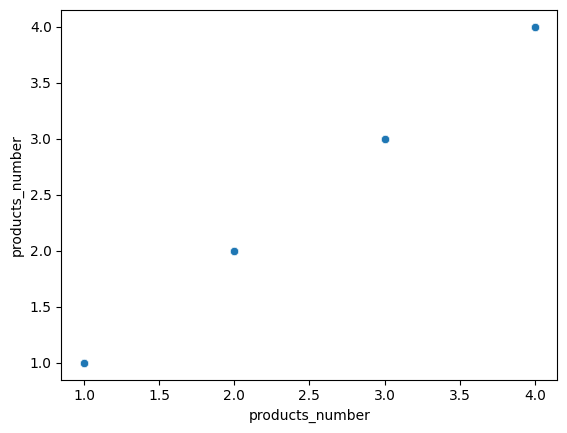

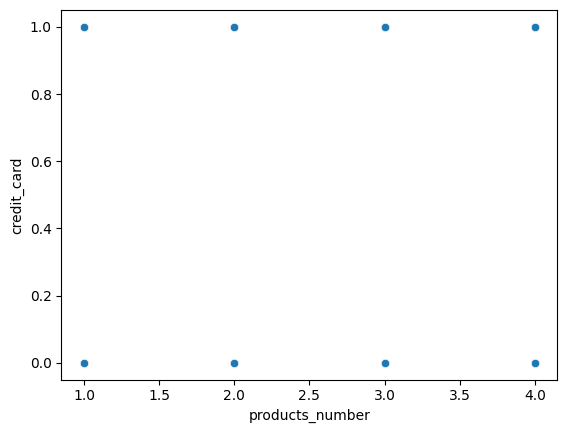

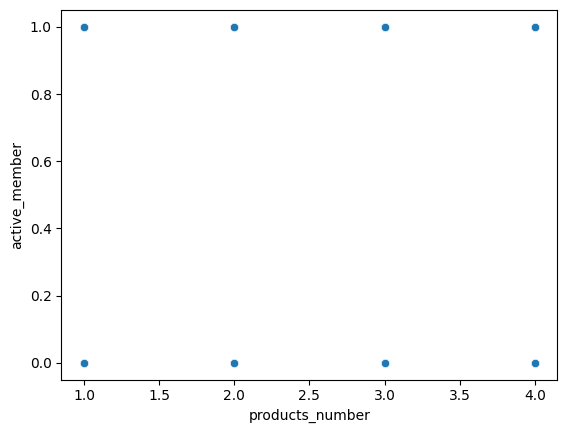

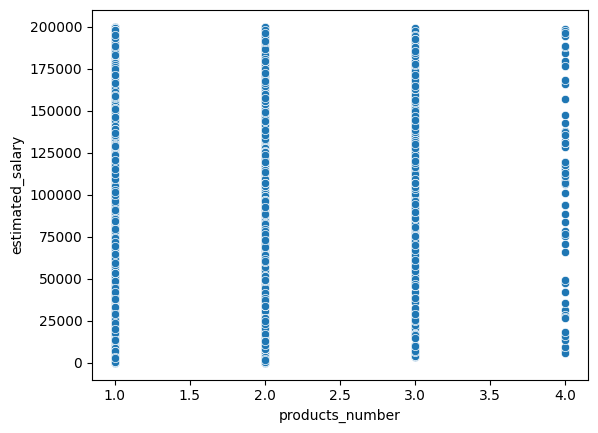

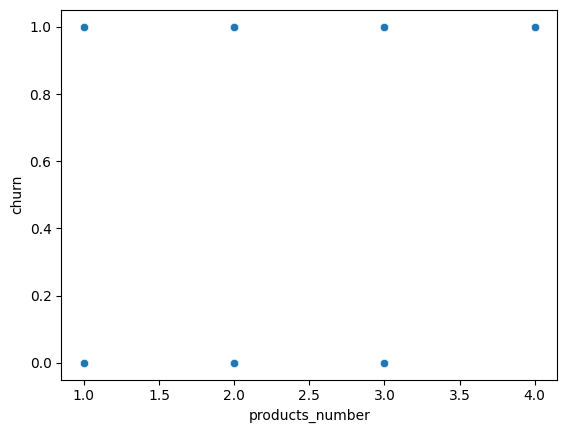

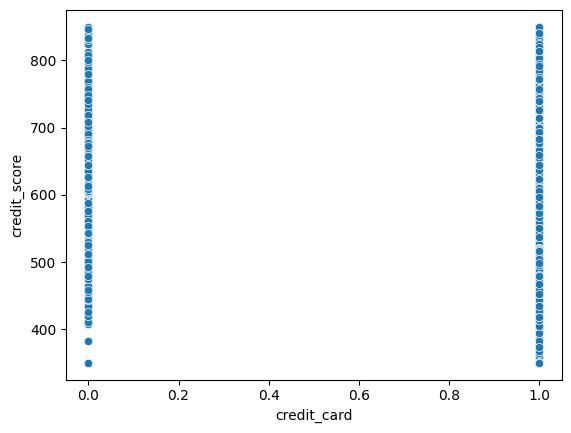

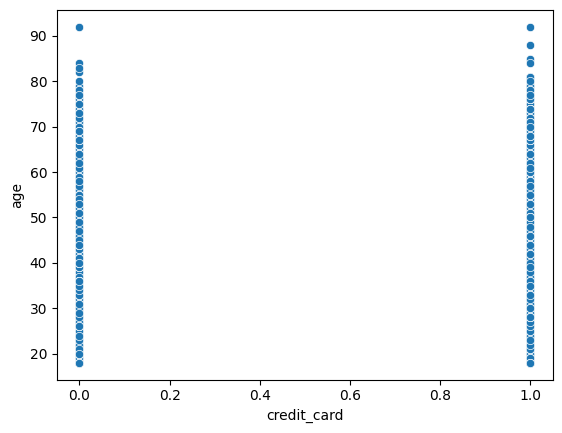

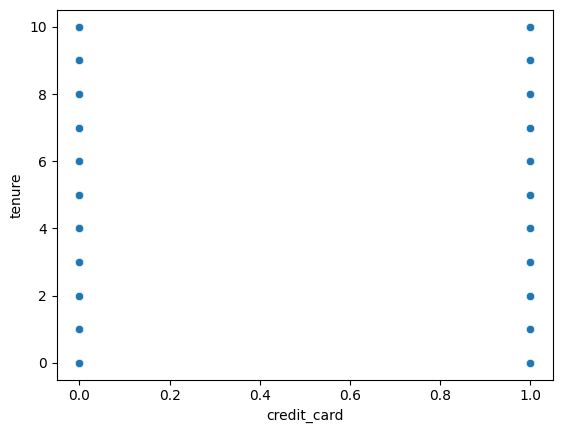

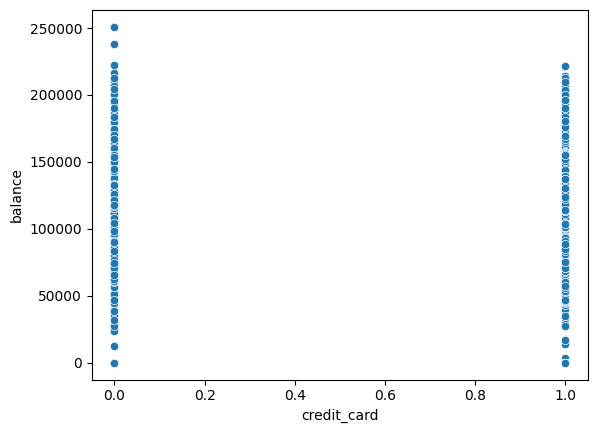

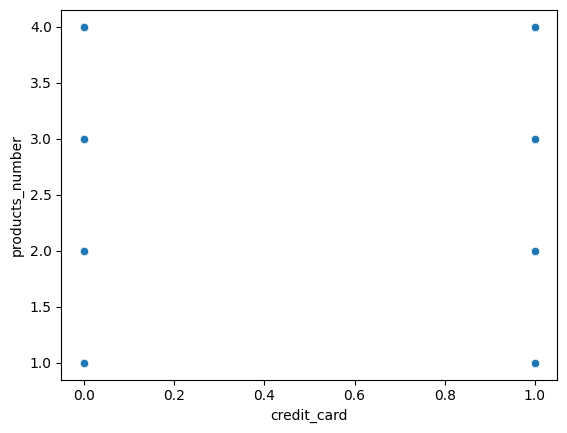

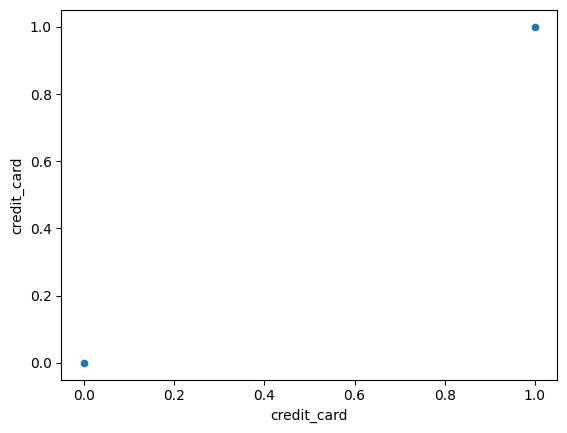

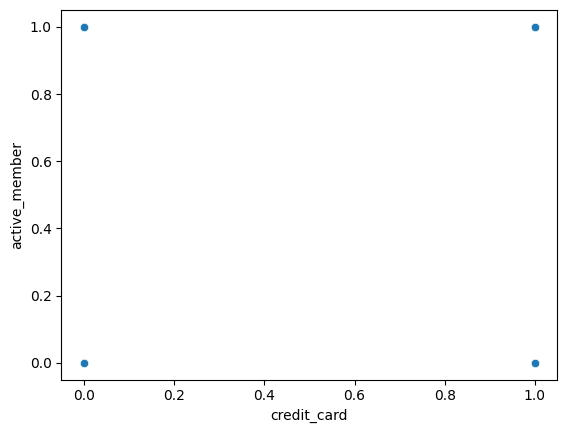

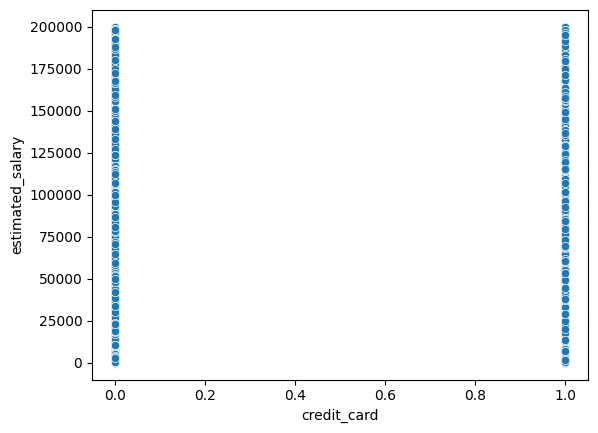

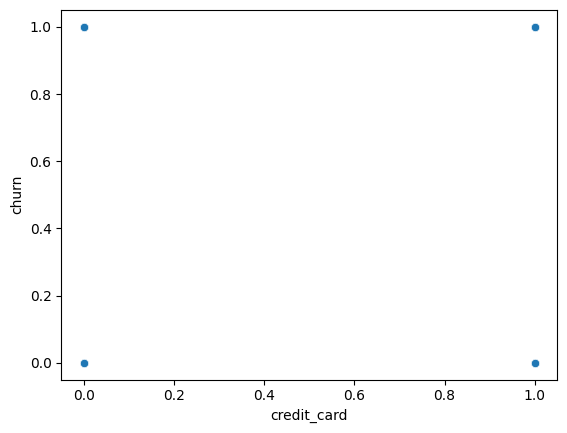

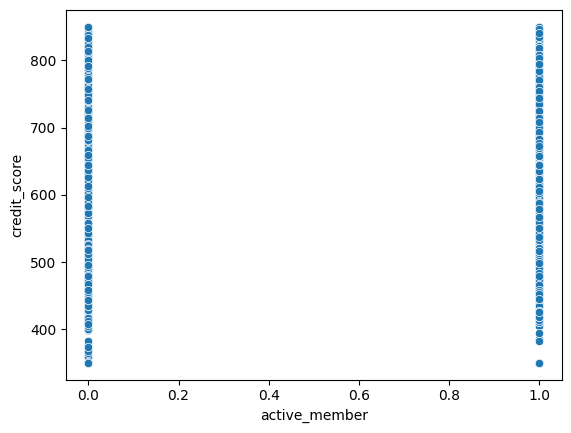

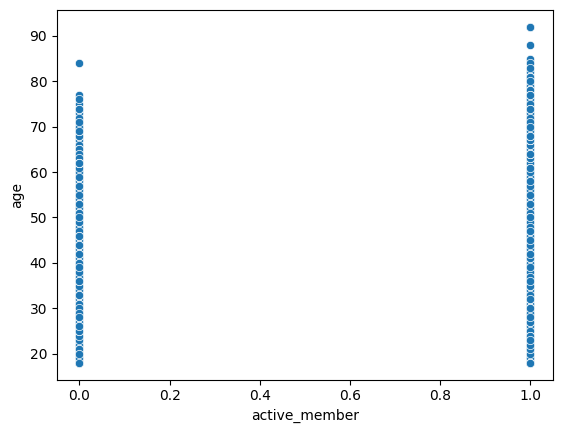

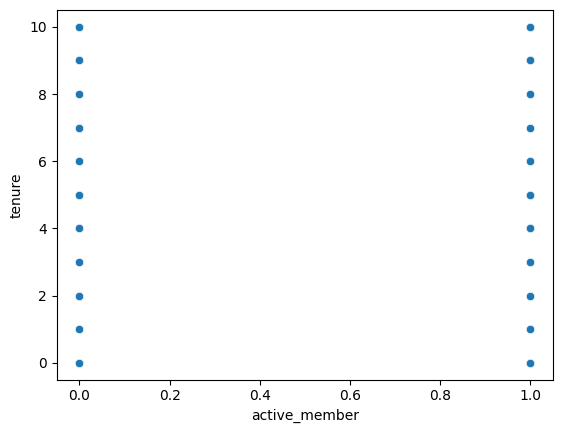

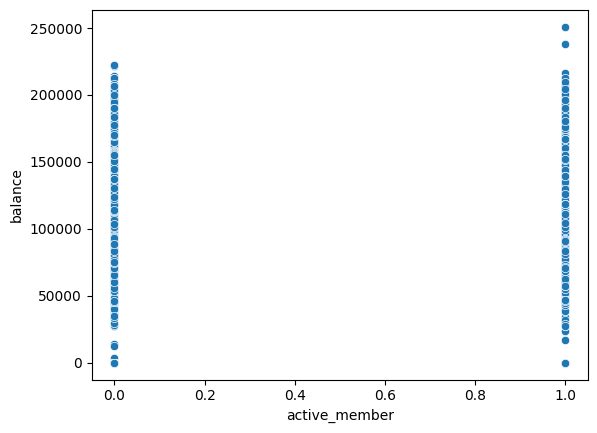

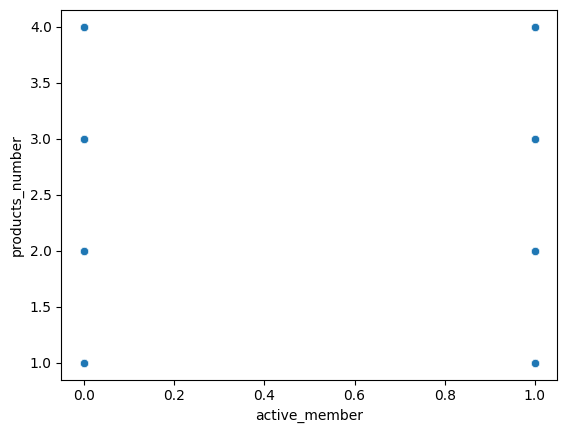

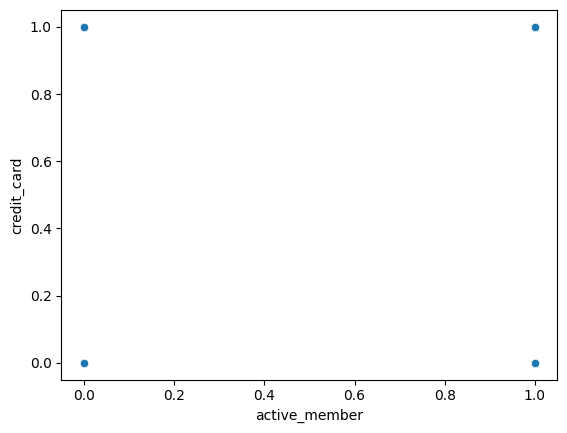

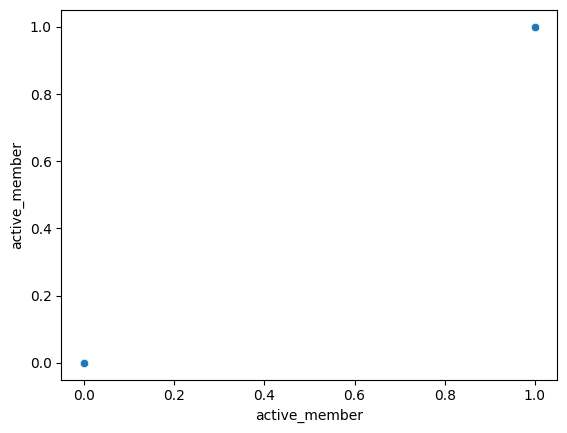

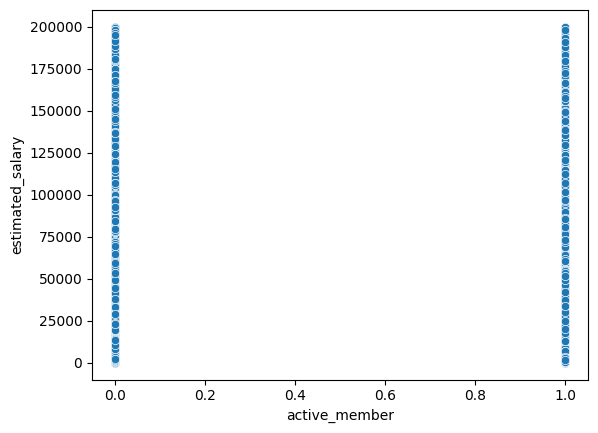

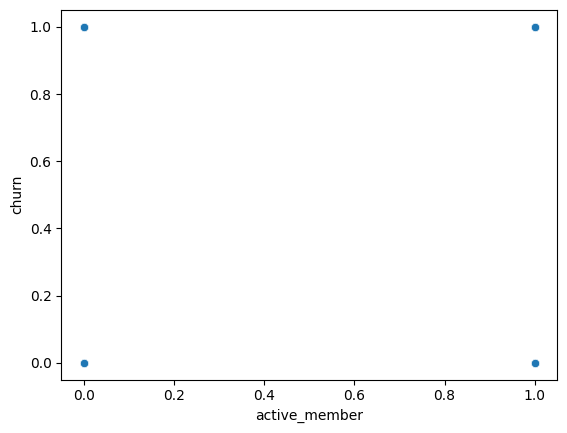

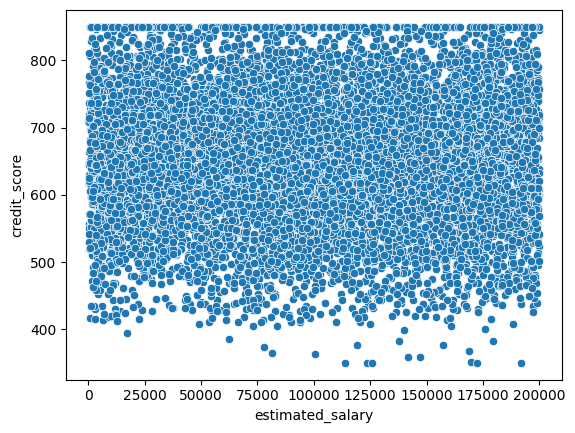

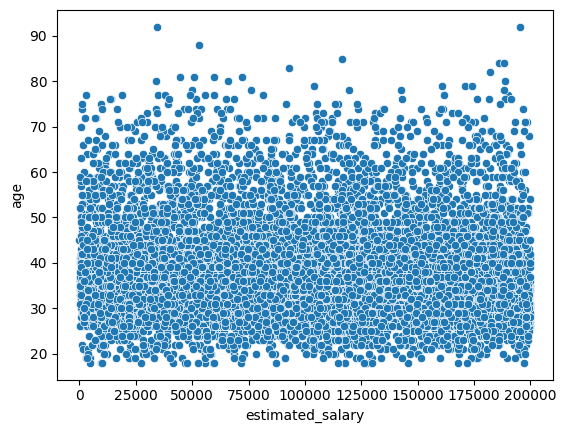

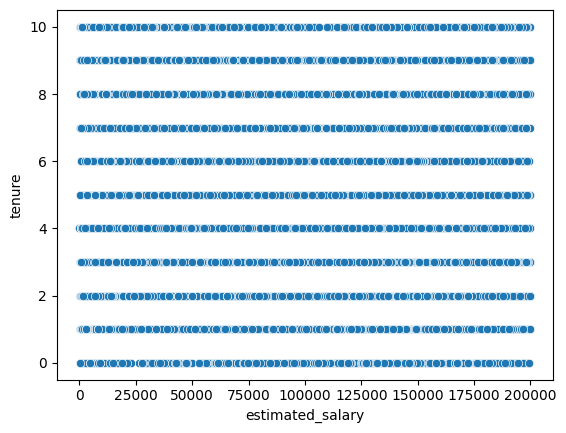

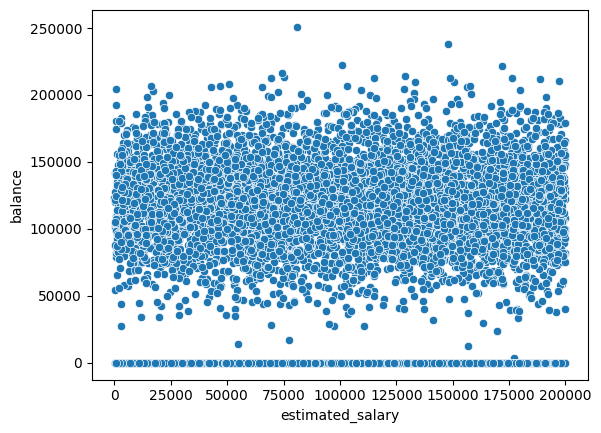

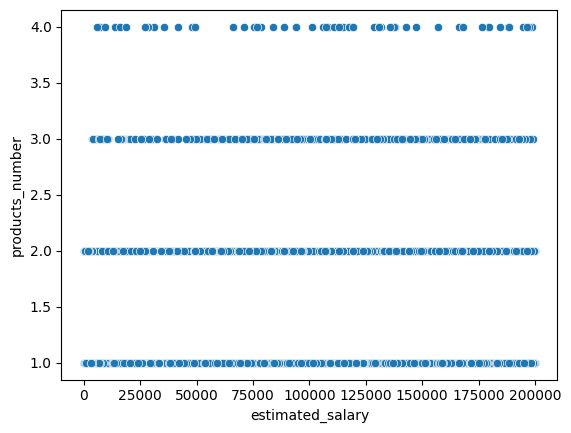

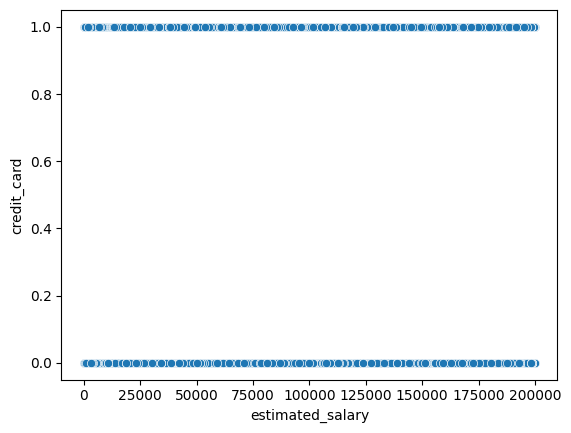

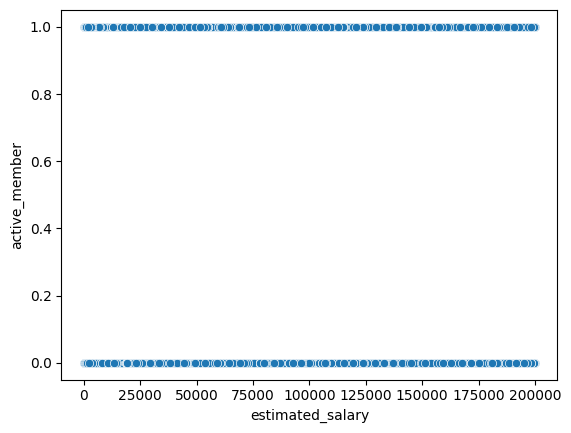

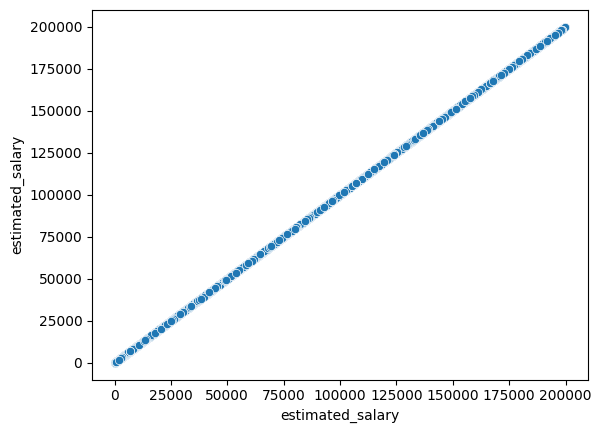

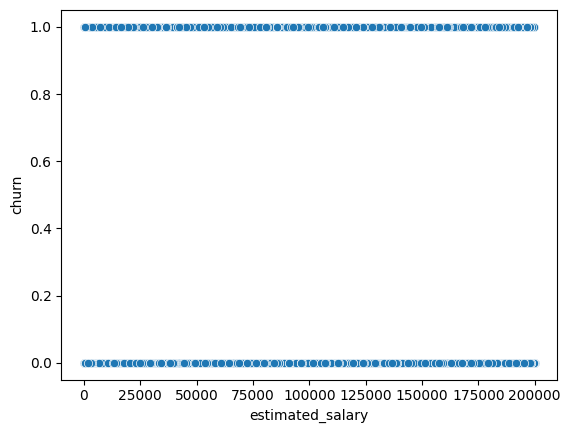

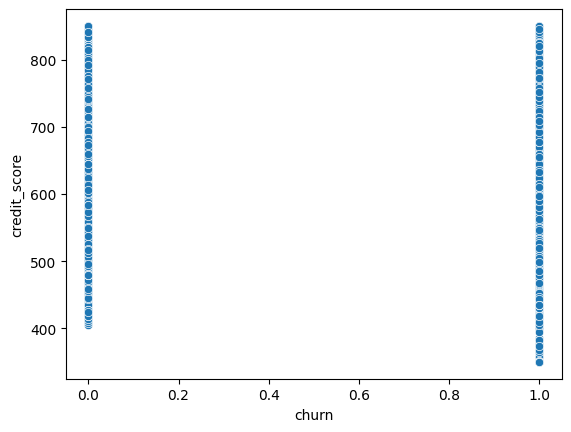

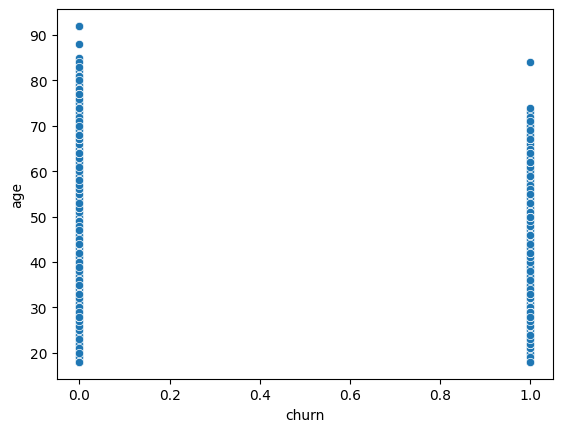

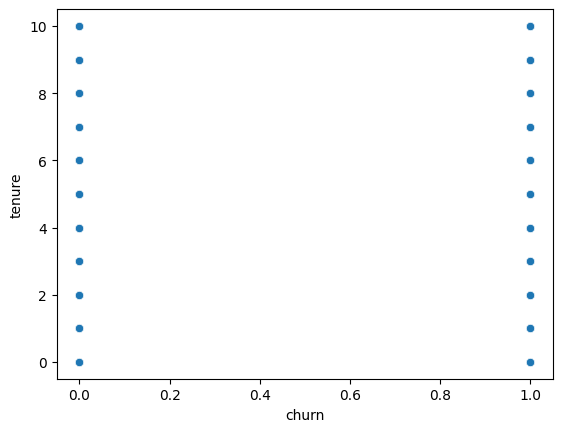

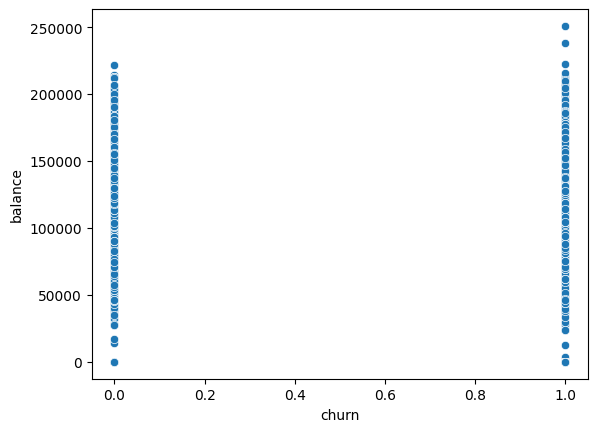

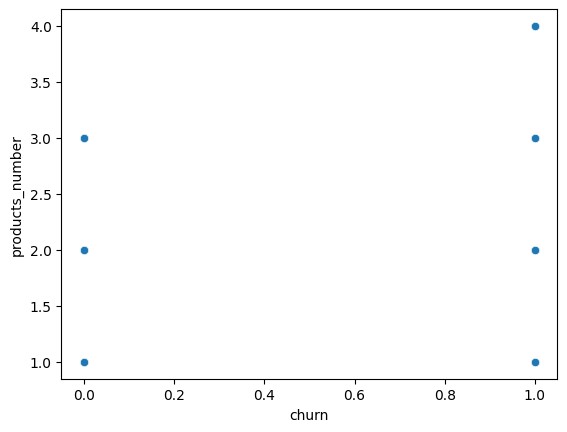

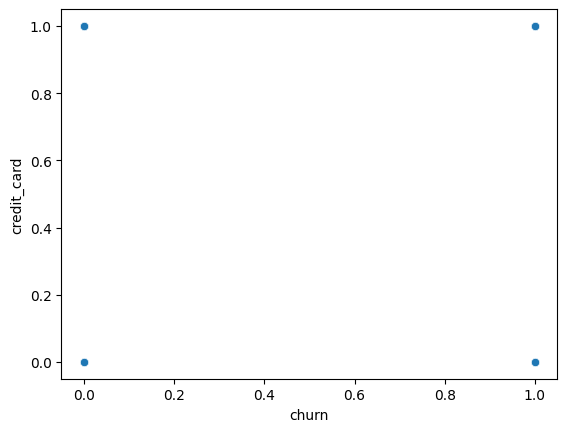

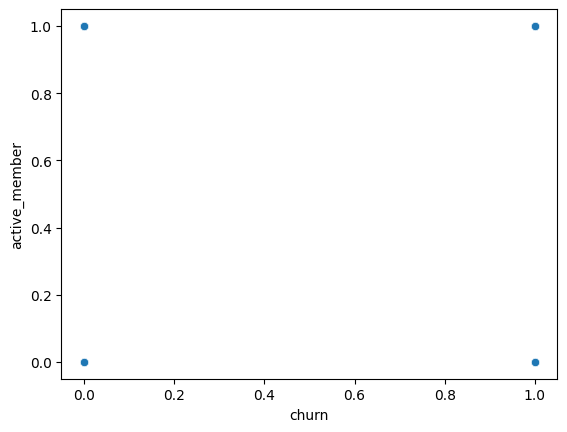

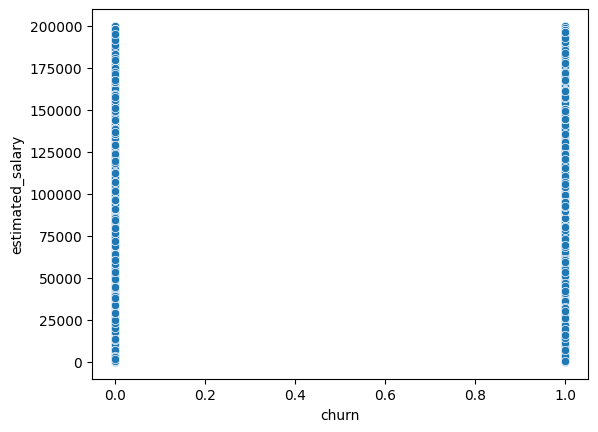

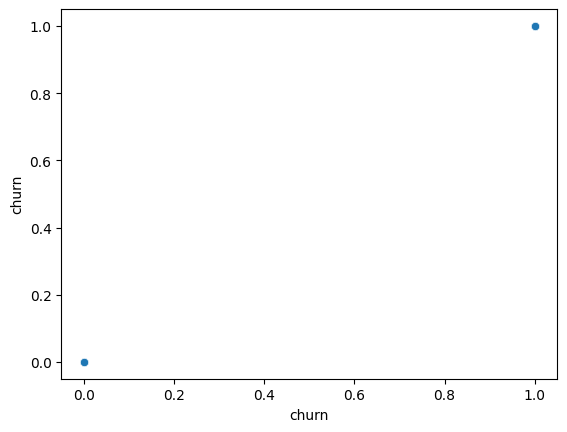

In [ ]:
for k in col:
  for l in col:
    if k!=l:
      sb.scatterplot(x = k,y = l,data = df)
      mpl.show()

In [ ]:
df = pd.get_dummies(df,drop_first=True)

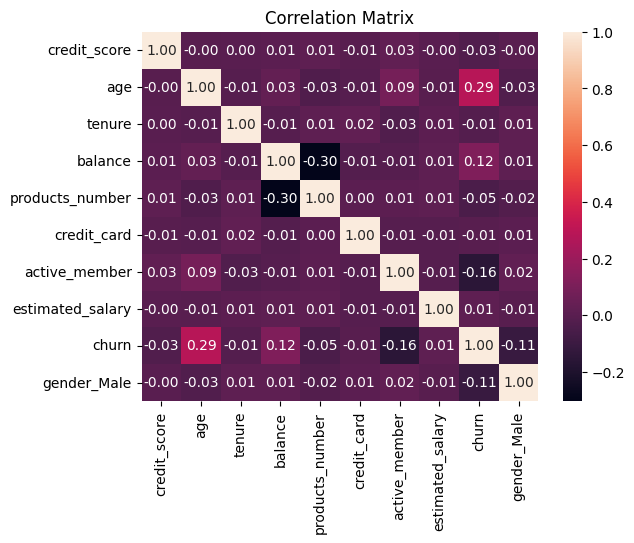

In [ ]:
sb.heatmap(df.corr(),annot = True,fmt = '.2f')
mpl.title('Correlation Matrix')
mpl.show()

In [ ]:
df.corr()['churn']

credit_score       -0.027094
age                 0.285323
tenure             -0.014001
balance             0.118533
products_number    -0.047820
credit_card        -0.007138
active_member      -0.156128
estimated_salary    0.012097
churn               1.000000
gender_Male        -0.106512
Name: churn, dtype: float64

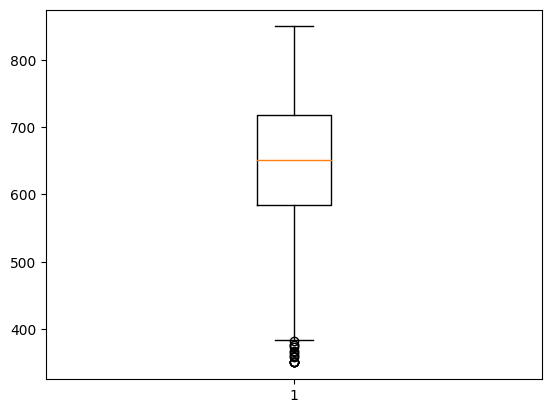

In [ ]:
box1 = mpl.boxplot(df['credit_score'])

In [ ]:
len([i.get_ydata() for i in box1['fliers']])

1

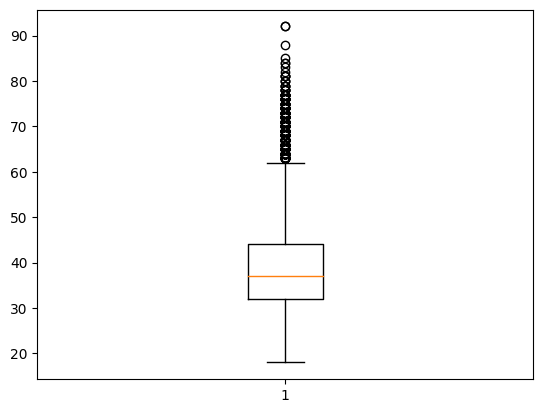

In [ ]:
box = mpl.boxplot(df['age'])

In [ ]:
len([i.get_ydata() for i in box['fliers']][0])

359

In [ ]:
from scipy.stats import zscore

In [ ]:
zscore(df['age'])

0       0.293517
1       0.198164
2       0.293517
3       0.007457
4       0.388871
          ...   
9995    0.007457
9996   -0.373958
9997   -0.278604
9998    0.293517
9999   -1.041433
Name: age, Length: 10000, dtype: float64

In [ ]:
df[(zscore(df['age'])>3)|(zscore(df['age'])<-3)]['age']

85      75
158     73
230     72
252     79
310     80
        ..
9646    71
9671    78
9736    78
9894    77
9936    77
Name: age, Length: 133, dtype: int64

In [ ]:
X = df.drop('churn',axis = 1)
y = df['churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.3)
X_train.shape,X_test.shape

((7000, 9), (3000, 9))

In [ ]:
from imblearn.combine import SMOTETomek
sampling = SMOTETomek()

In [ ]:
X_train_os,y_train_os = sampling.fit_resample(X_train,y_train)

In [ ]:
y_train_os.value_counts()

0    4712
1    4712
Name: churn, dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
transform = ColumnTransformer(transformers=[
    ('c1',StandardScaler(),['estimated_salary']),
    ('c2',StandardScaler(),['balance']),
    ('c3',RobustScaler(),['credit_score']),
    ('c4',RobustScaler(),['age'])
],remainder = 'passthrough')

In [ ]:
X_train_scl = transform.fit_transform(X_train_os)
X_test_scl = transform.transform(X_test)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor_model = lor.fit(X_train_scl,y_train_os)
lor_model

LogisticRegression()

In [ ]:
lor_y_pred = lor.predict(X_test_scl)
lor_y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,precision_score,recall_score

In [ ]:
def CM(Actual,Predicted):
  cm = sb.h`eatmap(confusion_matrix(Actual,Predicted),annot = True,fmt = '.2f',xticklabels=['yes','No'],yticklabels=['yes','No'])
  mpl.xlabel('Predicted')
  mpl.ylabel('Actual')
  return cm

In [ ]:
def ROC_Curve(Actual,Predicted):
  fpr,tpr,thresholds = roc_curve(Actual,Predicted)
  roc = mpl.plot(fpr,tpr)
  mpl.xlabel('False Possitive Rate')
  mpl.ylabel('True Possitive Rate')
  mpl.title('ROC Curve')
  mpl.show()
  return roc

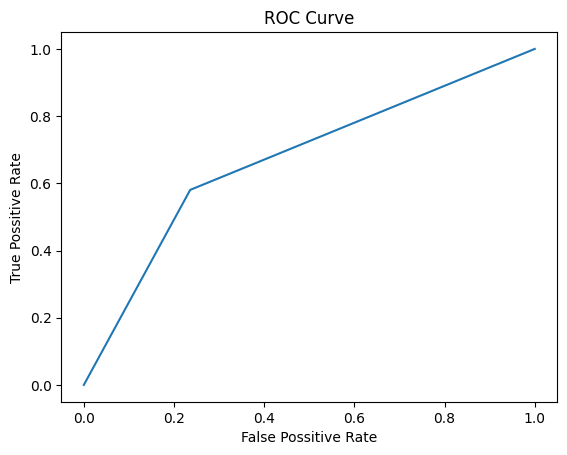

In [ ]:
ROC_Curve(y_test,lor_y_pred)

<Axes: xlabel='Predicted', ylabel='Actual'>

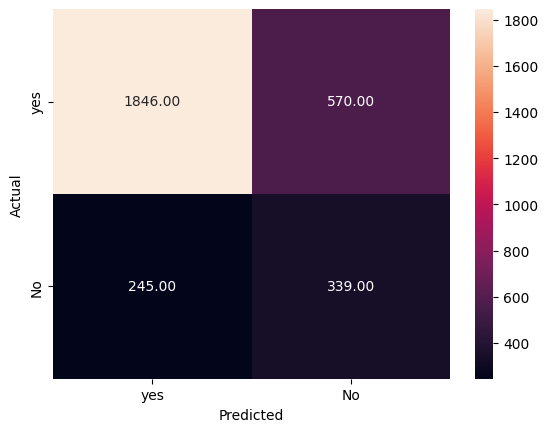

In [ ]:
CM(y_test,lor_y_pred)

In [ ]:
recall_score(y_test,lor_y_pred)

0.5804794520547946

In [ ]:
precision_score(y_test,lor_y_pred)

0.37293729372937295

In [ ]:
print(classification_report(y_test,lor_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      2416
           1       0.37      0.58      0.45       584

    accuracy                           0.73      3000
   macro avg       0.63      0.67      0.64      3000
weighted avg       0.78      0.73      0.75      3000



## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()
dt = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=20,max_depth = 5)
dt_model = dt.fit(X_train,y_train)
dt_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20)

In [ ]:
dt_y_pred = dt.predict(X_test)
dt_y_pred

array([0, 0, 0, ..., 0, 0, 0])

<Axes: xlabel='Predicted', ylabel='Actual'>

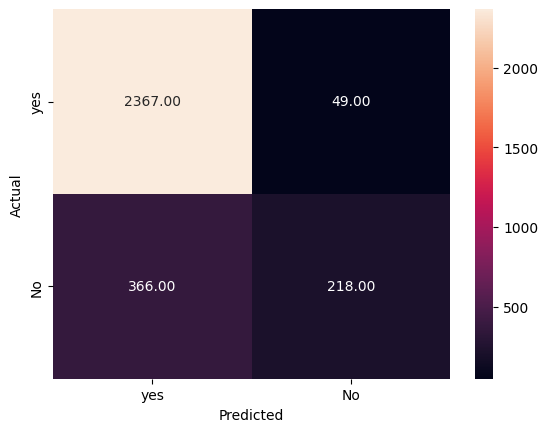

In [ ]:
CM(y_test,dt_y_pred)

In [ ]:
print(classification_report(y_test,dt_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.82      0.37      0.51       584

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.86      0.86      0.84      3000



**Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
tunning_dt = [{"criterion":['gini','entropy'],'max_depth':range(1,10),'min_samples_split':range(1,30)}]
gs_dt = GridSearchCV(DecisionTreeClassifier(),tunning_dt,scoring = 'accuracy',cv = 10)
gs_dt.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 10),
                          'min_samples_split': range(1, 30)}],
             scoring='accuracy')

In [ ]:
gs_dt.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [ ]:
gs_dt.best_score_

0.8522857142857143

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50,criterion = 'gini',min_samples_split=30)
rf_model = rf.fit(X_train,y_train)
rf_model

RandomForestClassifier(min_samples_split=30, n_estimators=50)

In [ ]:
rf_y_pred = rf.predict(X_test)
rf_y_pred

array([0, 0, 0, ..., 0, 0, 0])

<Axes: xlabel='Predicted', ylabel='Actual'>

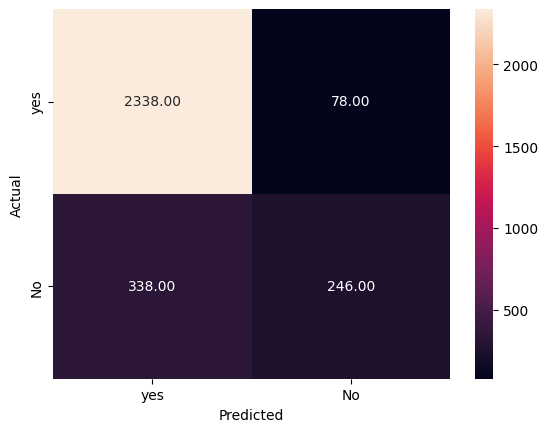

In [ ]:
CM(y_test,rf_y_pred)

In [ ]:
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2416
           1       0.76      0.42      0.54       584

    accuracy                           0.86      3000
   macro avg       0.82      0.69      0.73      3000
weighted avg       0.85      0.86      0.85      3000



Hyperparameter Tunning

In [ ]:
rf_tun = [{'min_samples_split':range(5,20),'n_estimators':range(1,10),'max_depth':[5,10,15]}]
gs_rf = GridSearchCV(RandomForestClassifier(),rf_tun,cv = 10,scoring = 'accuracy')
gs_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15],
                          'min_samples_split': range(5, 20),
                          'n_estimators': range(1, 10)}],
             scoring='accuracy')

In [ ]:
gs_rf.best_params_

{'max_depth': 10, 'min_samples_split': 13, 'n_estimators': 9}

In [ ]:
gs_rf.best_score_

0.853

# **Ada Boost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=  100,learning_rate = 0.1)
abc_clf = abc.fit(X_train_scl,y_train_os)

In [ ]:
abc_y_pred = abc.predict(X_test)
abc_y_pred

array([0, 0, 0, ..., 0, 0, 0])

<Axes: xlabel='Predicted', ylabel='Actual'>

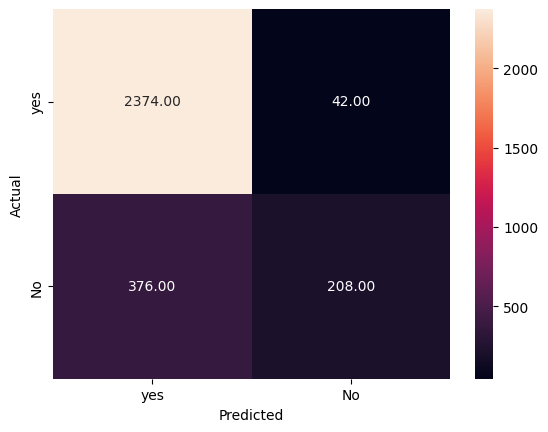

In [ ]:
CM(y_test,abc_y_pred)

In [ ]:
print(classification_report(y_test,abc_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2416
           1       0.83      0.36      0.50       584

    accuracy                           0.86      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.86      0.86      0.84      3000



**Hyperparameter tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
abc_gs =AdaBoostClassifier()
Tunning =[{'n_estimators':[100,500],'learning_rate': [0.1,0.001,0.0001,]}]
gs = GridSearchCV(abc_gs,Tunning,scoring='accuracy',cv = 10)
gs.fit(X_train_scl,y_train_os)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.001, 0.0001],
                          'n_estimators': [100, 500]}],
             scoring='accuracy')

In [ ]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [ ]:
gs.best_score_

0.8505714285714285

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xg = XGBClassifier()
model_xg.fit(X_train_scl,y_train_os)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xg_y_pred = model_xg.predict(X_test_scl)
xg_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test,xg_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2416
           1       0.66      0.43      0.52       584

    accuracy                           0.85      3000
   macro avg       0.77      0.69      0.71      3000
weighted avg       0.83      0.85      0.83      3000



<Axes: xlabel='Predicted', ylabel='Actual'>

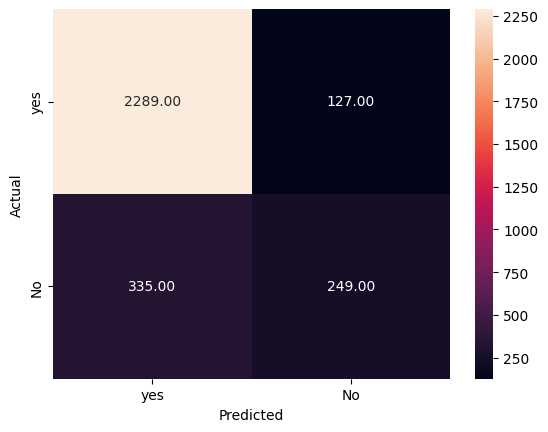

In [ ]:
CM(y_test,xg_y_pred)

Hyperparameter Tunning

In [ ]:
param_grid = {
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': range(3,7),
    'n_estimators': [100,200,300],
    'subsample': [0.8, 1.0],
}

In [ ]:
grid_search = GridSearchCV(estimator=model_xg, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scl,y_train_os)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': range(3, 7),
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}

In [ ]:
grid_search.best_score_

0.8547142857142858

## **SVM**

In [ ]:
from sklearn.svm import SVC
SVC = SVC(kernel= "poly")
SVC_cls = SVC.fit(X_train_scl,y_train_os)

In [ ]:
svc_y_pred = SVC.predict(X_test_scl)
svc_y_pred

array([0, 0, 0, ..., 0, 0, 0])

<Axes: xlabel='Predicted', ylabel='Actual'>

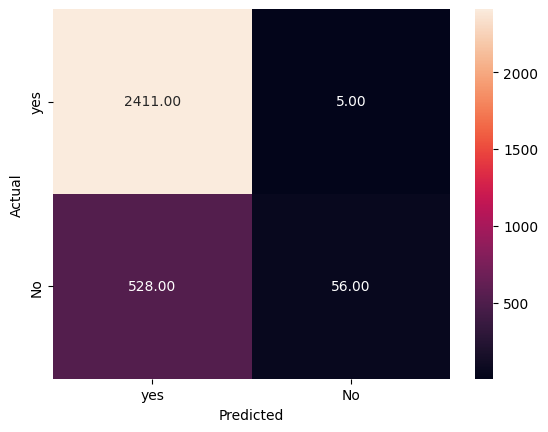

In [ ]:
CM(y_test,svc_y_pred)

In [ ]:
print(classification_report(y_test,svc_y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2416
           1       0.92      0.10      0.17       584

    accuracy                           0.82      3000
   macro avg       0.87      0.55      0.54      3000
weighted avg       0.84      0.82      0.76      3000



In [ ]:
svm_tun = [{"kernel":["poly","sigmoid",'rbf']}]
svm_gs = GridSearchCV(SVC,svm_tun,cv=10,scoring = 'accuracy')
svm_gs.fit(X_train_scl,y_train_os)

GridSearchCV(cv=10, estimator=SVC(kernel='poly'),
             param_grid=[{'kernel': ['poly', 'sigmoid', 'rbf']}],
             scoring='accuracy')

In [ ]:
svm_gs.best_params_

{'kernel': 'poly'}

In [ ]:
svm_gs.best_score_

0.8071428571428572

## **Neural Network**

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [ ]:
callback = EarlyStopping(
    patience=10,
    monitor = "val_loss",
    min_delta = 0.001,
    verbose = 0,
    mode= "auto"
)

In [ ]:
model = Sequential()
model.add(Dense(36,activation = 'relu',input_dim = 9,kernel_initializer = "glorot_normal"))
model.add(Dense(36,activation = 'relu',kernel_initializer = "glorot_normal"))
model.add(Dense(36,activation = 'relu',kernel_initializer = "glorot_normal"))
model.add(Dense(36,activation = 'relu',kernel_initializer = "glorot_normal"))
model.add(Dropout(0.3))
model.add(Dense(1,activation = "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                360       
                                                                 
 dense_1 (Dense)             (None, 36)                1332      
                                                                 
 dense_2 (Dense)             (None, 36)                1332      
                                                                 
 dense_3 (Dense)             (None, 36)                1332      
                                                                 
 dropout (Dropout)           (None, 36)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 37        
                                                                 
Total params: 4,393
Trainable params: 4,393
Non-trainabl

In [ ]:
model.get_weights()[0]

array([[ 3.35459292e-01, -2.37904295e-01,  6.50664866e-02,
        -1.05070934e-01, -3.32809627e-01,  6.77526444e-02,
         2.52547145e-01, -9.24114063e-02, -8.84914622e-02,
        -1.01884574e-01,  5.50766662e-02,  3.56993645e-01,
         2.09585473e-01, -3.41173291e-01, -2.30461106e-01,
         1.13732293e-01, -4.13428545e-02, -2.92893708e-01,
         5.94084244e-03, -2.09823802e-01, -2.79247344e-01,
         5.66028710e-03, -1.80276707e-01, -1.82033584e-01,
         3.17700088e-01, -2.46388927e-01,  2.33698353e-01,
         2.18167692e-01, -1.71311840e-01,  2.37975150e-01,
        -3.11719596e-01,  1.17467400e-02,  1.68754458e-01,
        -2.93421388e-01, -1.84346780e-01, -3.37988943e-01],
       [ 5.17162047e-02,  1.53034464e-01, -2.51787789e-02,
        -4.60513413e-01,  2.95650005e-01,  3.77047472e-02,
         1.29786536e-01, -8.56953189e-02,  3.11468214e-01,
        -4.49063689e-01,  1.70455918e-01,  4.50208515e-01,
         1.12620465e-01, -1.78660825e-01, -9.30636823e-

In [ ]:
model.compile(optimizer = "Adam",metrics = 'accuracy',loss = 'binary_crossentropy')
history = model.fit(X_train_scl,y_train,validation_data =(X_test_scl,y_test),
                    epochs = 1000,callbacks = callback,batch_size = 32)

Epoch 1/1000
219/219 [==============================] - 8s 6ms/step - loss: 0.4765 - accuracy: 0.7891 - val_loss: 0.4265 - val_accuracy: 0.8060
Epoch 2/1000
219/219 [==============================] - 1s 5ms/step - loss: 0.4395 - accuracy: 0.8051 - val_loss: 0.4155 - val_accuracy: 0.8197
Epoch 3/1000
219/219 [==============================] - 1s 4ms/step - loss: 0.4197 - accuracy: 0.8236 - val_loss: 0.3908 - val_accuracy: 0.8423
Epoch 4/1000
219/219 [==============================] - 1s 4ms/step - loss: 0.4006 - accuracy: 0.8337 - val_loss: 0.3727 - val_accuracy: 0.8457
Epoch 5/1000
219/219 [==============================] - 1s 5ms/step - loss: 0.3794 - accuracy: 0.8429 - val_loss: 0.3674 - val_accuracy: 0.8477
Epoch 6/1000
219/219 [==============================] - 1s 4ms/step - loss: 0.3695 - accuracy: 0.8479 - val_loss: 0.3583 - val_accuracy: 0.8577
Epoch 7/1000
219/219 [==============================] - 1s 5ms/step - loss: 0.3646 - accuracy: 0.8493 - val_loss: 0.3560 - val_accuracy:

In [ ]:
model.get_weights()[0]

array([[ 2.17664599e-01, -1.64165467e-01,  1.35803863e-01,
        -1.41992763e-01, -3.15182209e-01, -3.94688174e-03,
         1.79637954e-01, -6.15602210e-02,  8.65146145e-02,
        -7.02598989e-02,  8.68236721e-02,  2.73707360e-01,
         3.08663212e-02, -1.90919787e-01, -1.42362833e-01,
         5.10742776e-02,  1.01811193e-01, -3.89435947e-01,
         8.11061561e-02, -1.96402356e-01, -1.95483133e-01,
        -5.52436989e-03, -1.49927869e-01, -3.20398599e-01,
         4.18662935e-01, -7.53889829e-02,  2.12792486e-01,
         2.45995075e-01, -1.49364499e-02,  2.50625670e-01,
        -2.91160643e-01, -6.23353235e-02,  1.66874006e-01,
        -2.57384390e-01, -2.77335167e-01, -4.05683964e-01],
       [ 7.42297329e-04,  1.70607880e-01,  1.38158826e-02,
        -4.72528547e-01,  1.60727307e-01,  6.18288741e-02,
         5.26778214e-03, -1.48718700e-01,  3.09281468e-01,
        -5.56394041e-01,  6.98563382e-02,  3.76199275e-01,
         2.47120425e-01, -3.01233516e-03, -1.22152299e-

In [ ]:
NN_y_pred = model.predict(X_test_scl)
NN_Y_pred = np.where(NN_y_pred>0.5,1,0)
NN_Y_pred

94/94 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

<Axes: xlabel='Predicted', ylabel='Actual'>

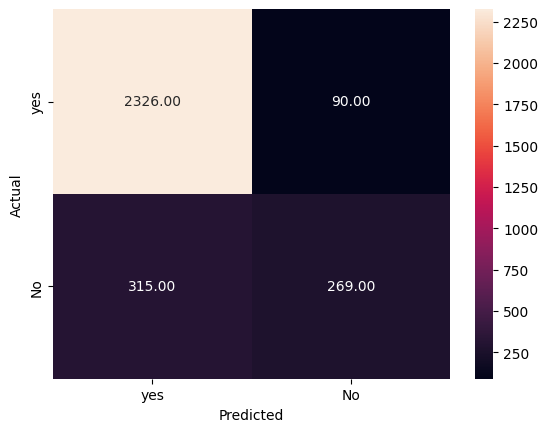

In [ ]:
CM(y_test,NN_Y_pred)

In [ ]:
print(classification_report(y_test,NN_Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.46      0.57       584

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000



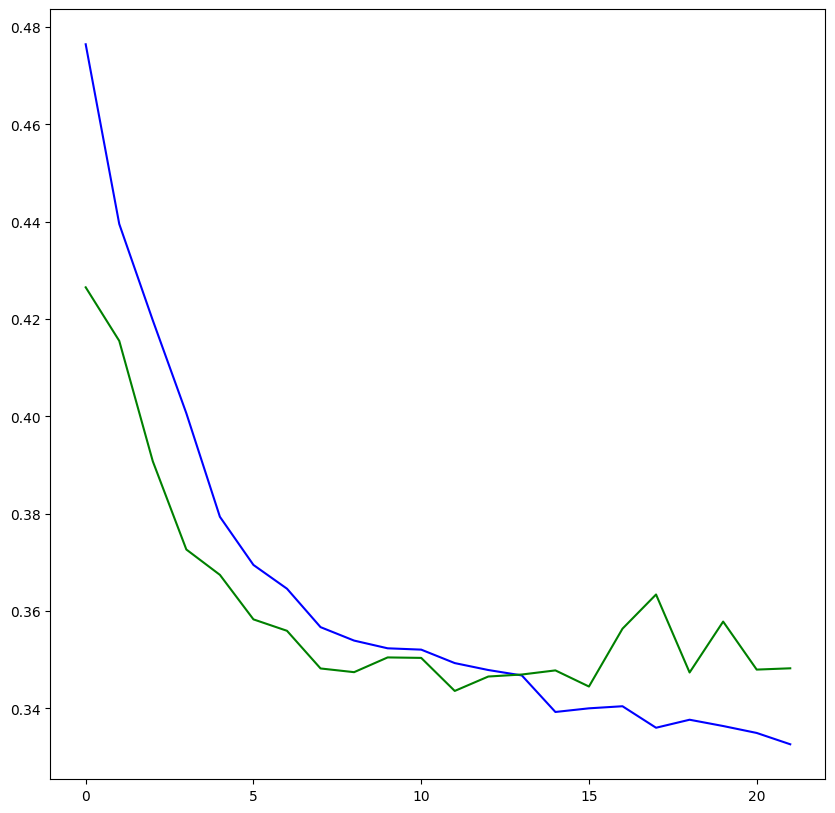

In [ ]:
mpl.figure(figsize = (10,10))
mpl.plot(history.history['loss'] ,label='Training Loss',color = 'blue')
mpl.plot(history.history['val_loss'], label='Validation Loss',color = 'green')

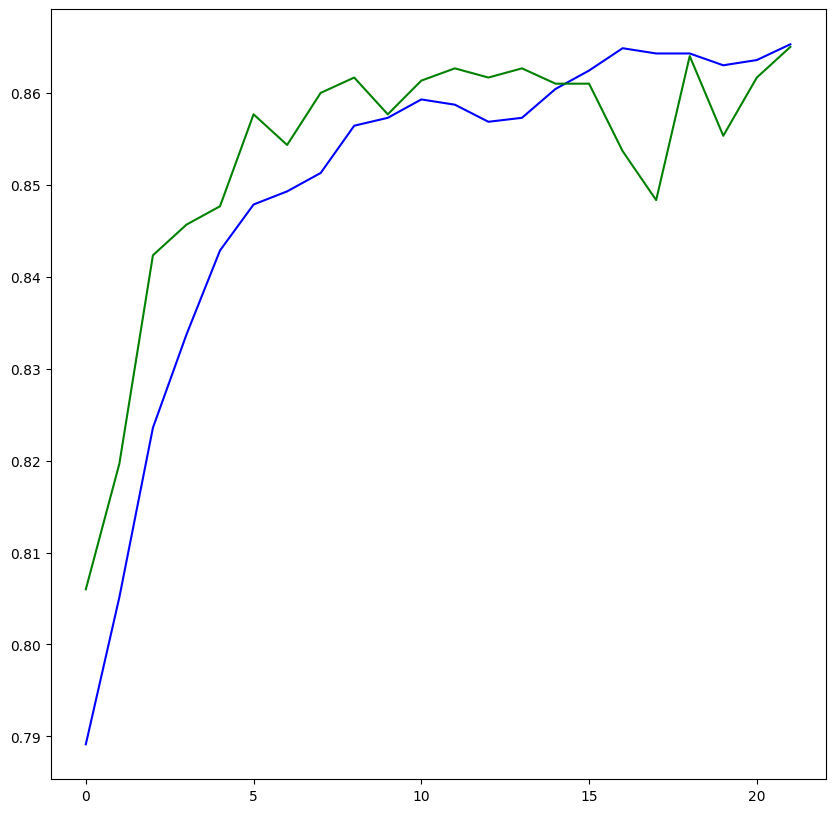

In [ ]:
mpl.figure(figsize = (10,10))
mpl.plot(history.history['accuracy'],color = 'blue')
mpl.plot(history.history['val_accuracy'],color = 'green')

# **AUTO ML**

In [ ]:
!pip install pycaret

In [ ]:
import pycaret
from pycaret.classification import setup

In [ ]:
setup(df,target = 'churn')

In [ ]:
from pycaret.classification import compare_models
best_model = compare_models()

In [ ]:
from pycaret.classification import finalize_model,save_model
final_model = finalize_model(best_model)
save_model(final_model,'final_model')